# Import Libraries and Define Wave Function

In [1]:
import numpy as np
import pytalises as pt
import matplotlib.pyplot as plt
import warnings
from matplotlib import animation, rc
from IPython.display import HTML

warnings.filterwarnings('ignore')

%matplotlib inline


from sympy import *
x, t = symbols('x t', real=True)

N = 3e4                         # Number of Rubidium atoms 
m = 1.4447e-25                  # Mass of Rb atom
hbar = 1.0545718e-34            # Reduced Planck's constant

a0 =  5.29e-11                  # Bohr radius 
a_s = 100 * a0                  # Scattering length

g = N*((4*np.pi*hbar**2*a_s)/m) # interaction potential

N_x = 128                       
x_min = 3e-5
x_max = 3e-5

x0 = 0
sig_x = 1.0e-6

y0 =  0
sig_y = 1.0e-6

z0 = 0
sig_z = 1.0e-6

M = 64

# Defining the wave function

psi_i = pt.Wavefunction("exp(-((x-x0)**2)/(2*sig_x**2))*exp(-((y-y0)**2)/(2*sig_y**2))*exp(-((z-z0)**2)/(2*sig_z**2))", 
                        variables = {'x0': x0, 'sig_x':  sig_x, 'y0': y0, 'sig_y':  sig_y, 'z0': z0, 'sig_z':  sig_z}, 
                        number_of_grid_points = (N_x,N_x,N_x), spatial_ext = [(-x_min, x_max),(-x_min, x_max),(-x_min, x_max)], 
                        m = m, normalize_const = N)


# Wave function optimizing

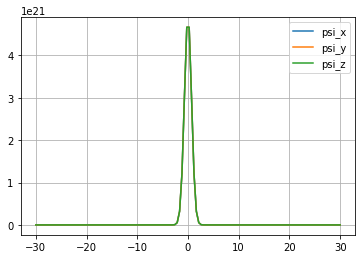

In [2]:
plt.plot(psi_i.r[0]*1e6, (np.abs(psi_i.amp[:,M,M]))**2, label = 'psi_x')
plt.plot(psi_i.r[1]*1e6, (np.abs(psi_i.amp[M,:,M]))**2, label = 'psi_y')
plt.plot(psi_i.r[2]*1e6, (np.abs(psi_i.amp[M,M,:]))**2, label = 'psi_z')
plt.grid()
plt.legend()

In [3]:
# psi_i.k[0].max() # checking the maximum momentum represented by the wave function

In [4]:
# psi_i.fft()
# plt.plot(psi_i.k[0], (np.abs(psi_i.amp[:,M,M])**2), label = 'psi_x')
# plt.plot(psi_i.k[1]*1e6, (np.abs(psi_i.amp[M,:,M])**2), label = 'psi_y')
# plt.plot(psi_i.k[2]*1e6, (np.abs(psi_i.amp[M,M,:])**2), label = 'psi_z')
# plt.grid()
# plt.legend()

In [5]:
# psi_i.ifft()
# plt.plot(psi_i.r[0]*1e6, np.sum(np.sum(((np.abs(psi_i.amp))**2), axis = 1), axis = 1))

# Defining <x^2> & < x > 

In [6]:
# Defining the variance <x^2> of the gaussian for x,y,z axes

sigma_x = np.array(sig_x)
sigma_y = np.array(sig_y)
sigma_z = np.array(sig_z)

# Defining the expected position of the particle <x> for x,y,z axes

exp_x = np.array(psi_i.exp_pos(0))
exp_y = np.array(psi_i.exp_pos(1))
exp_z = np.array(psi_i.exp_pos(2))

# Defining the time of flight 
ToF = np.array((psi_i.t))

In [7]:
sigma_x, sigma_y, sigma_z, exp_x, exp_y, exp_z, ToF

(array(1.e-06),
 array(1.e-06),
 array(1.e-06),
 array(1.23061091e-17),
 array(1.2516126e-17),
 array(1.18711889e-17),
 array(0.))

# Imaginary Time evolution - anisotropic 3D harmonic potential 

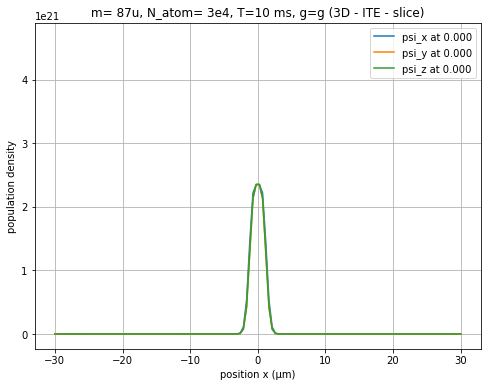

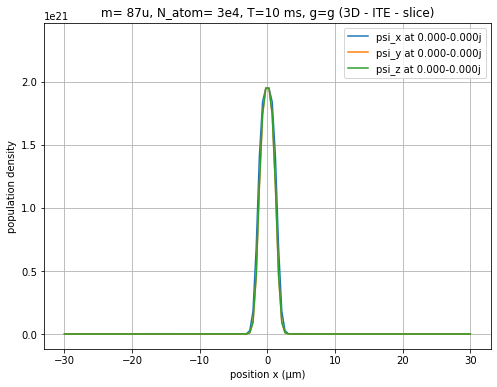

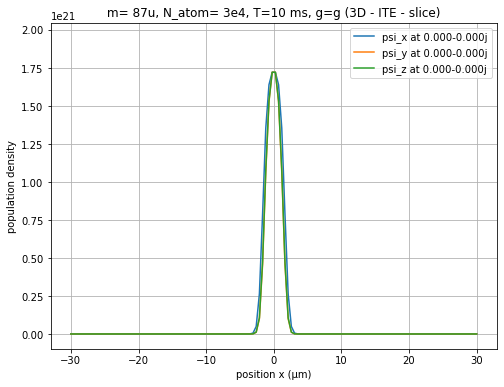

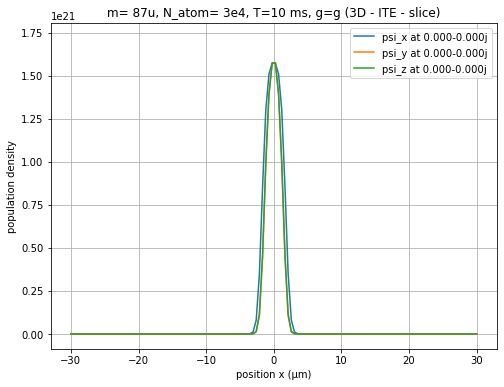

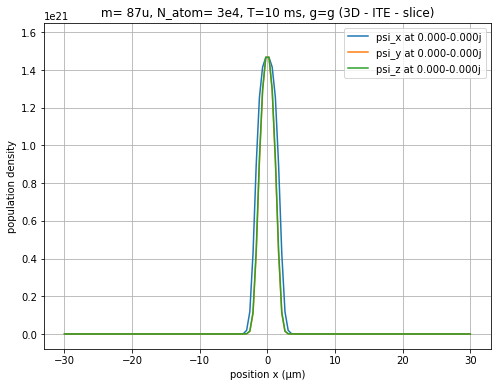

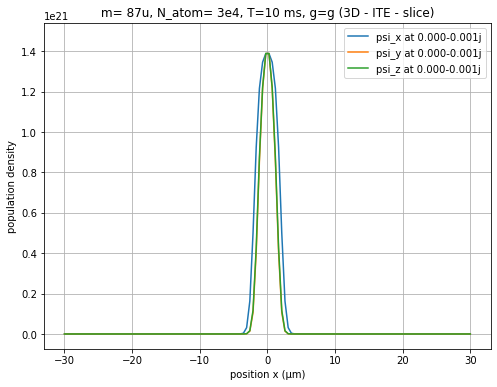

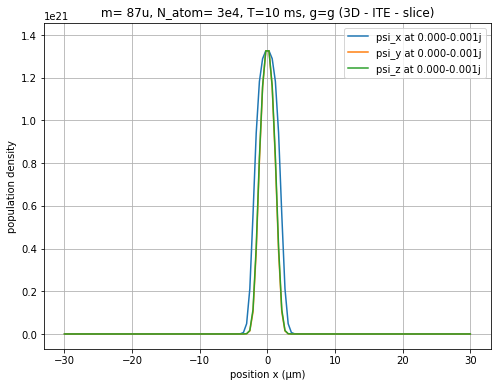

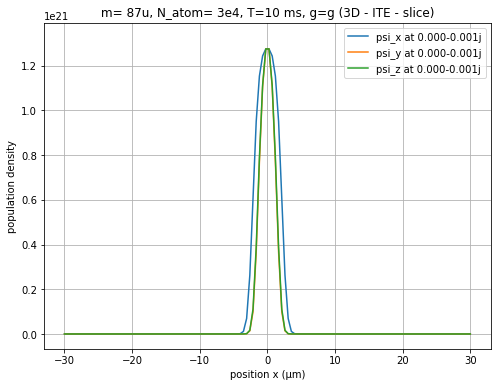

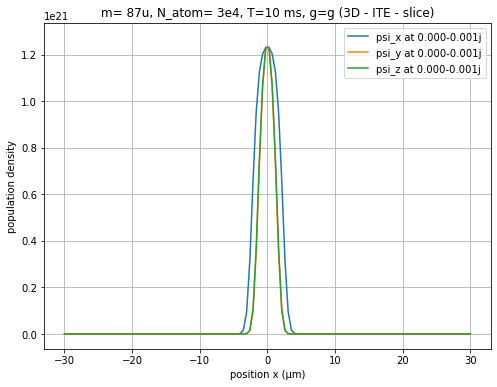

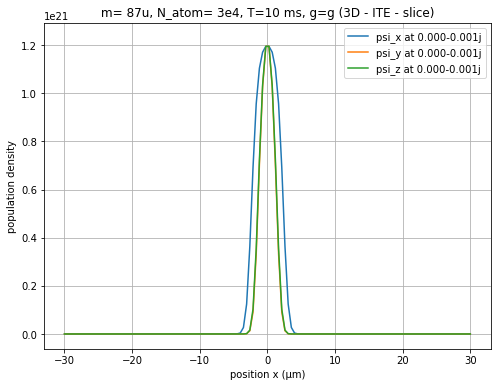

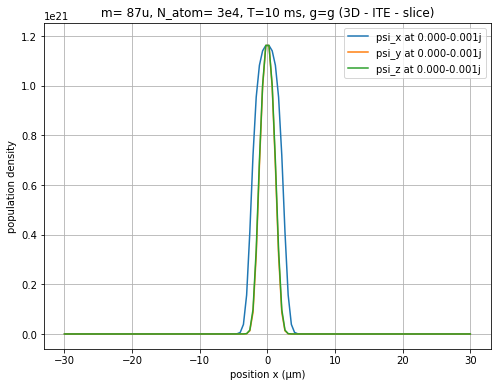

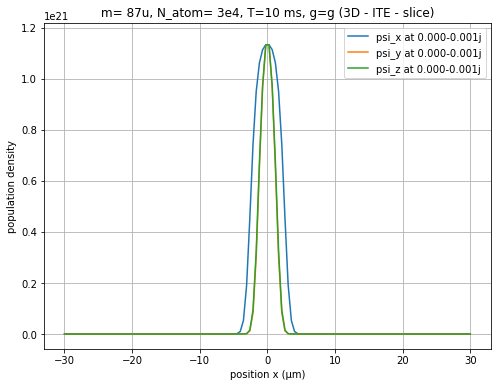

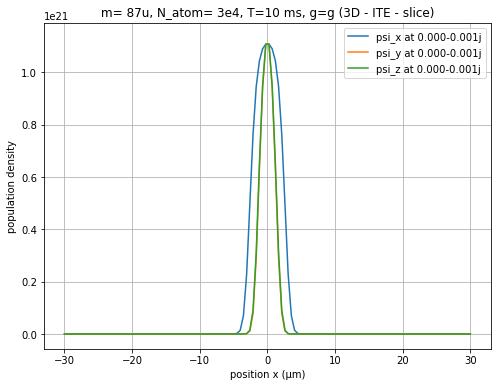

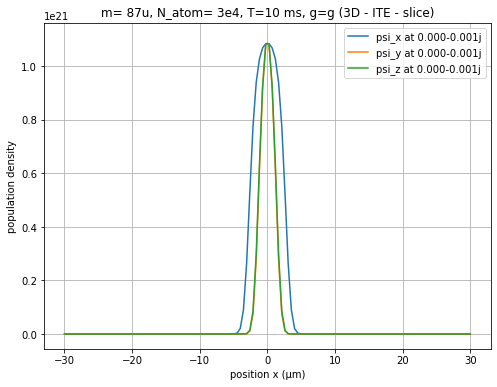

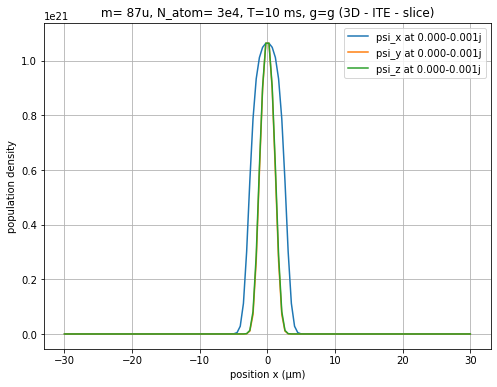

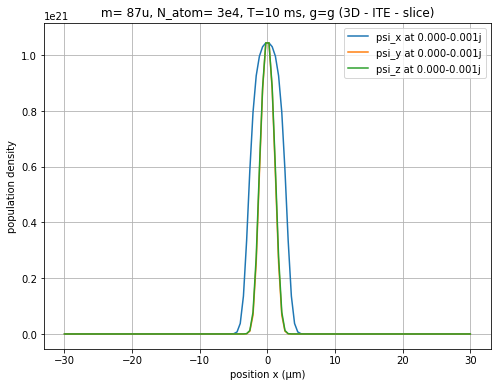

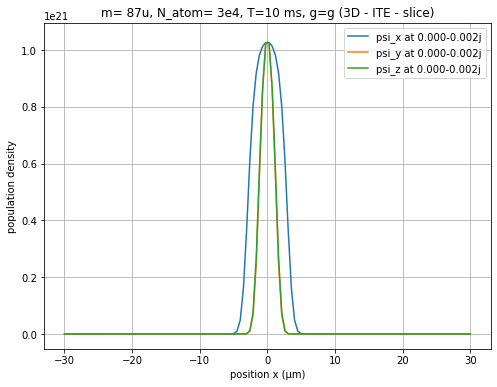

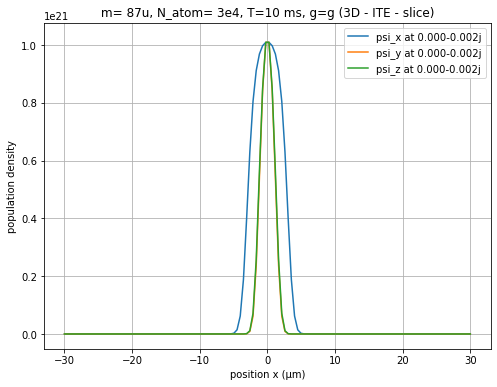

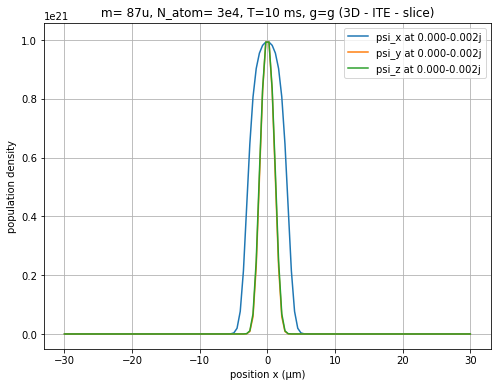

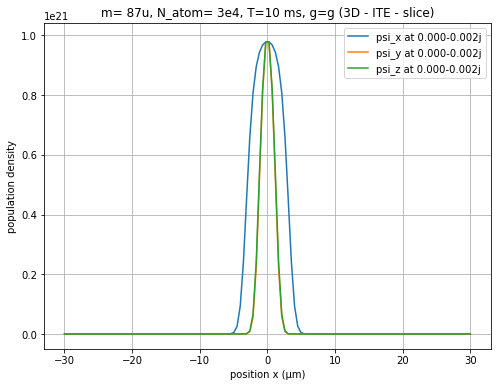

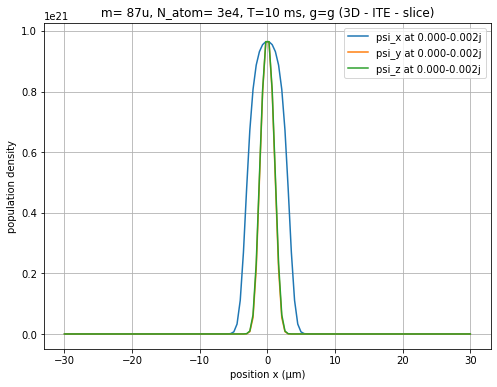

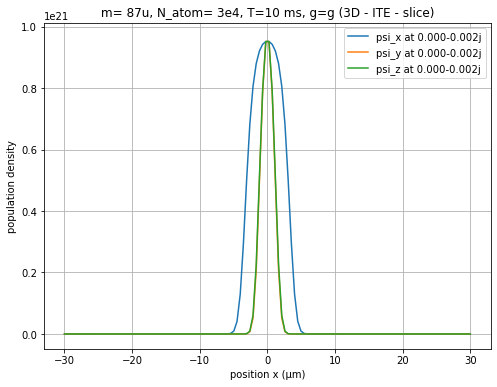

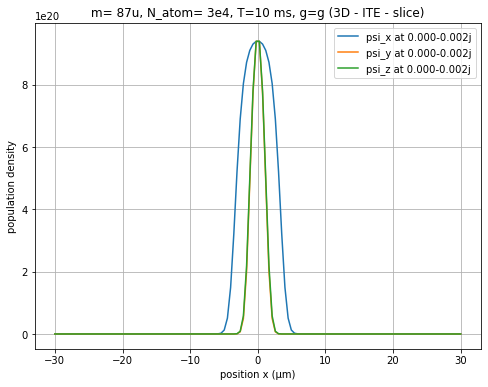

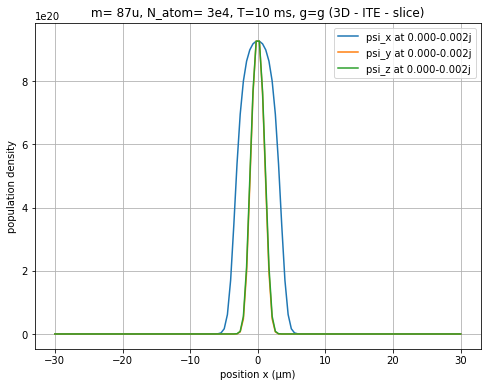

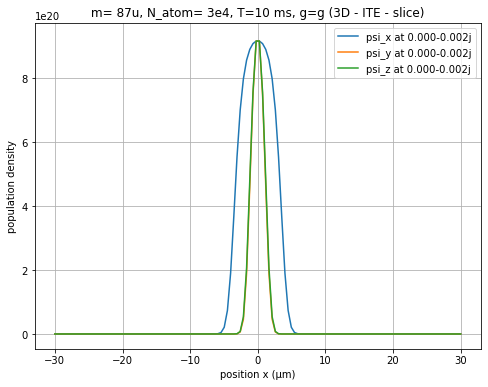

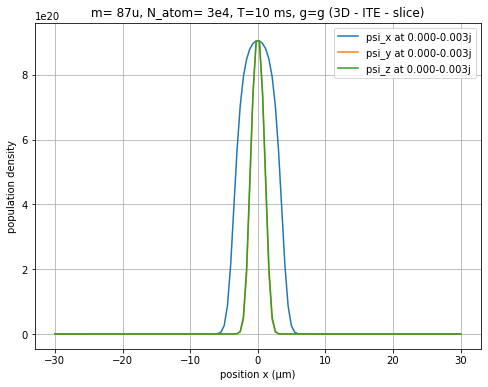

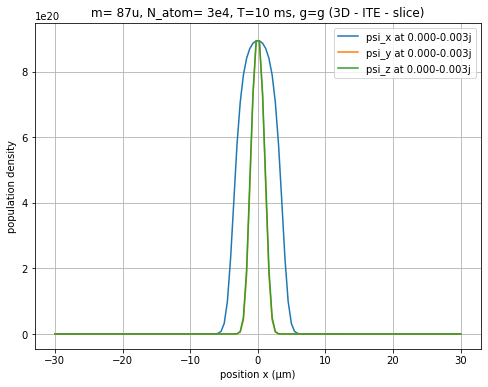

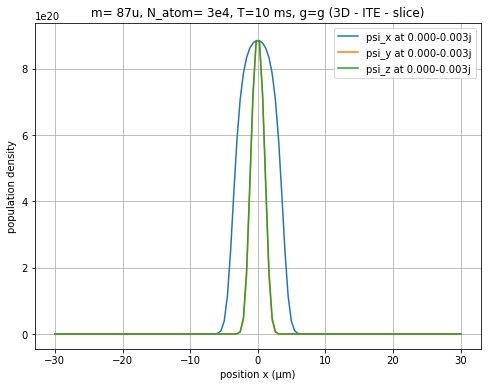

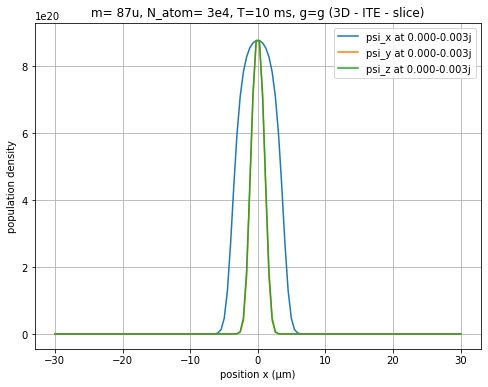

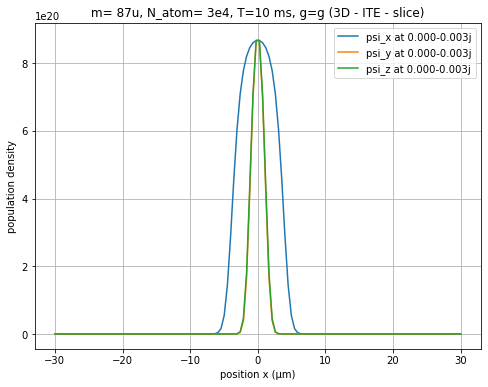

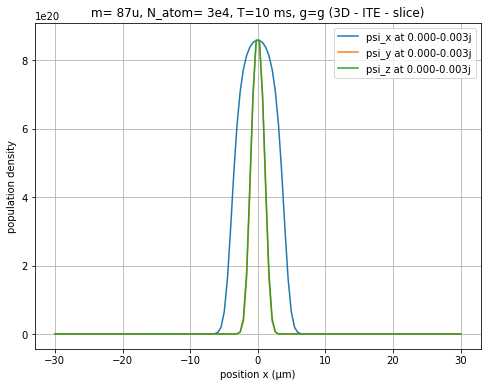

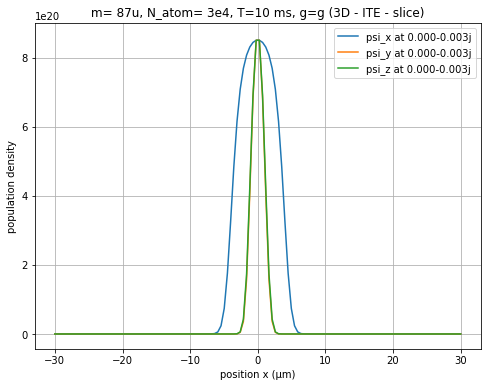

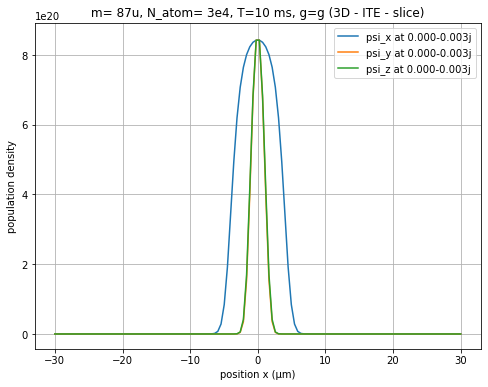

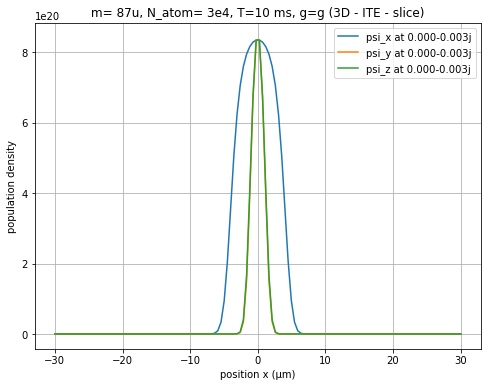

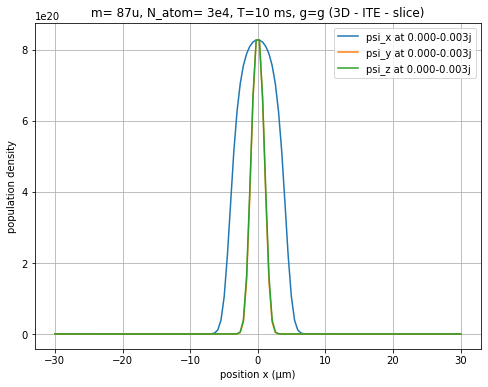

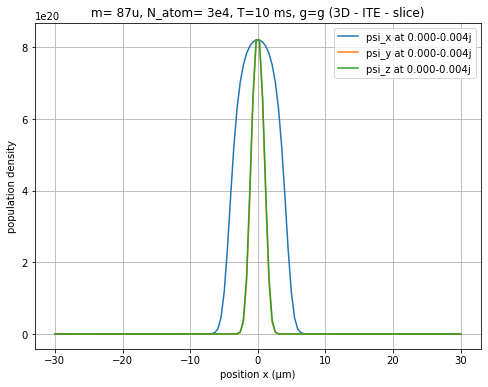

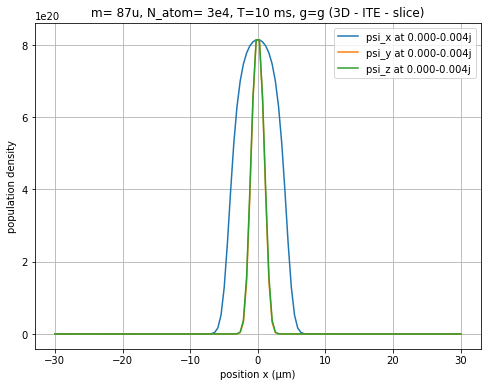

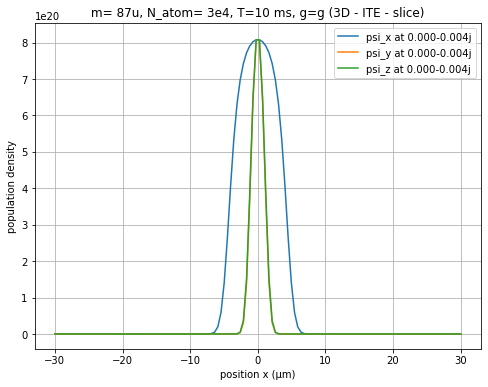

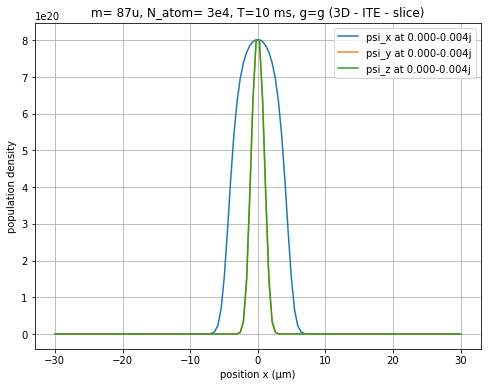

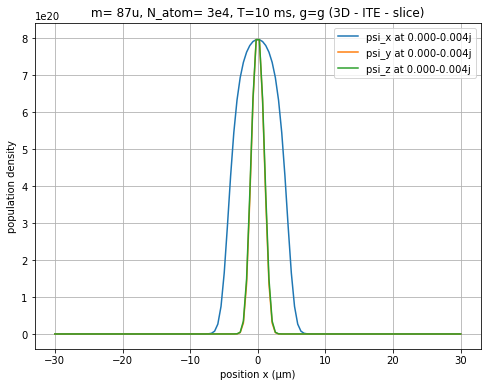

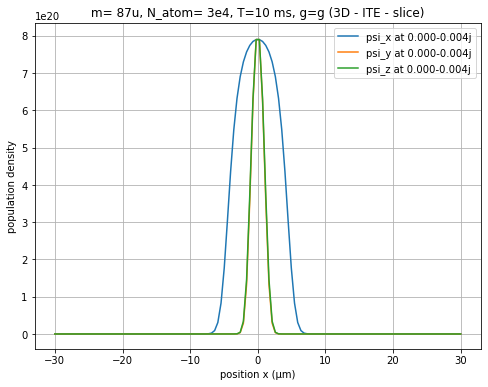

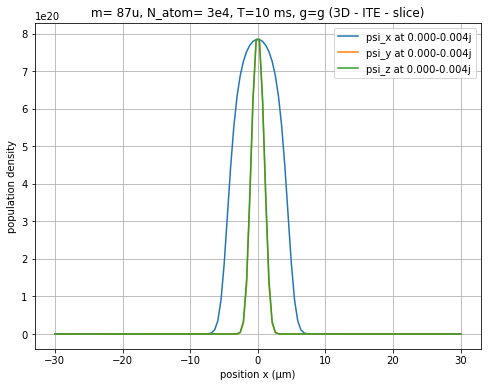

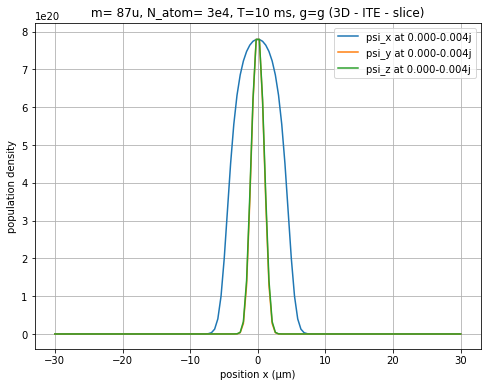

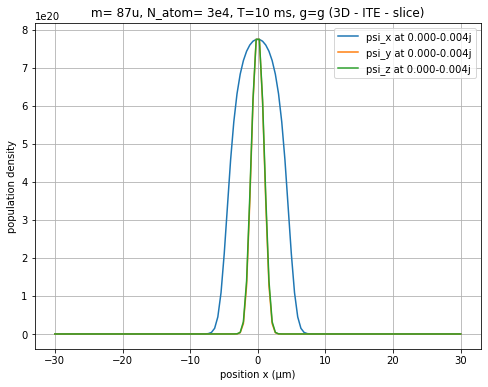

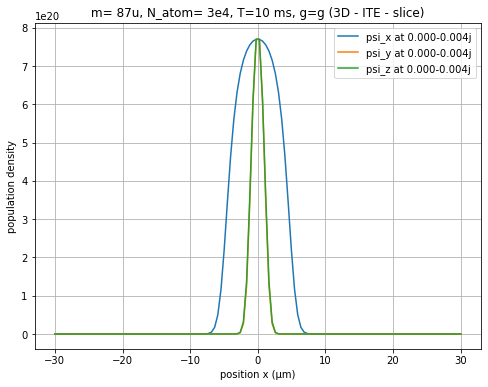

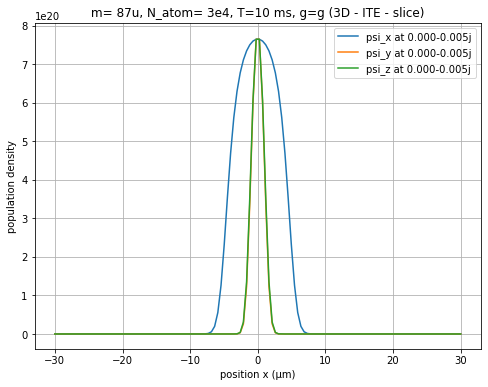

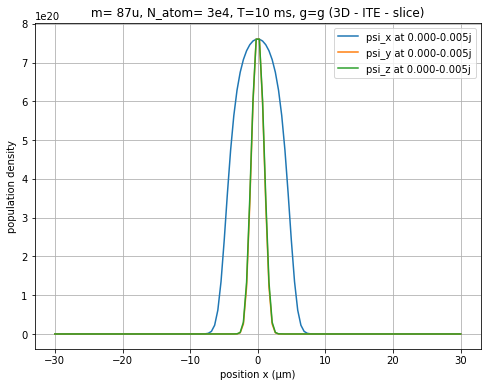

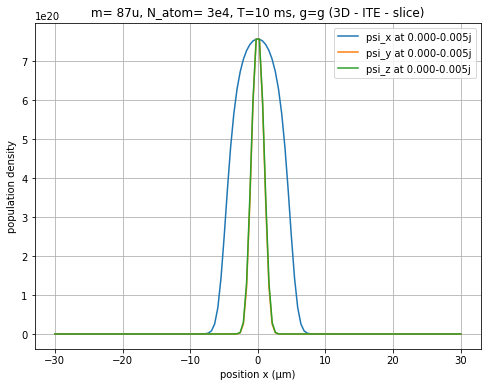

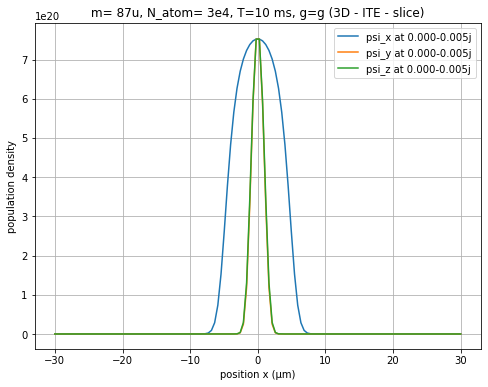

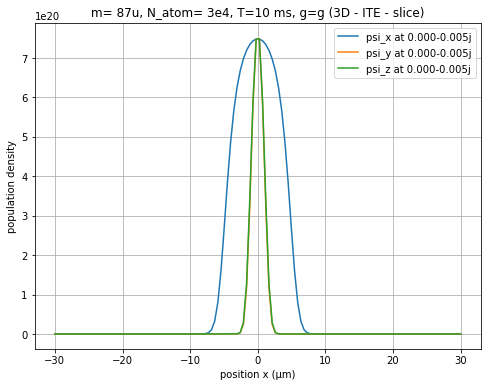

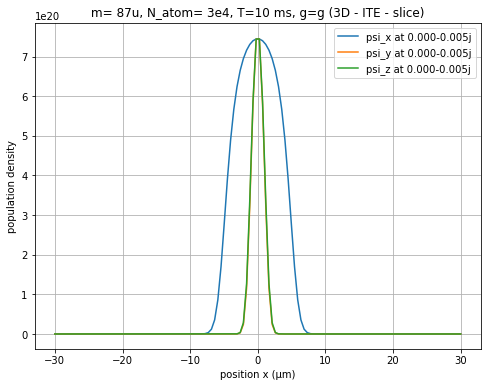

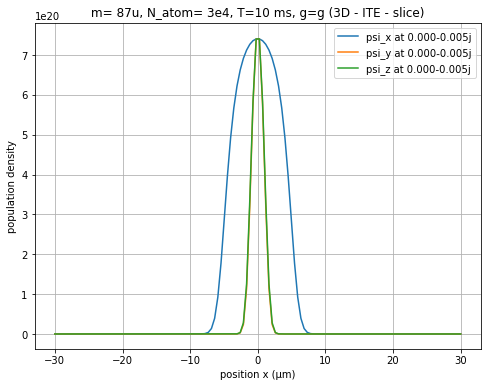

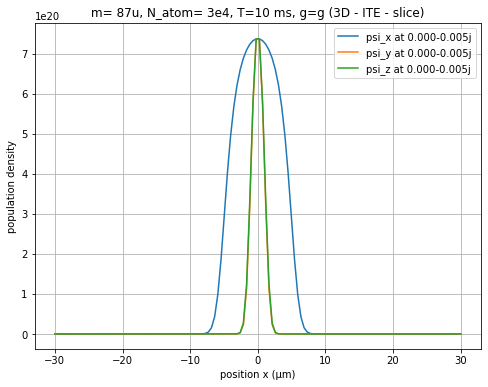

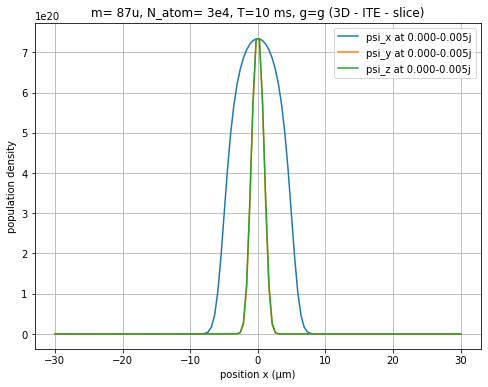

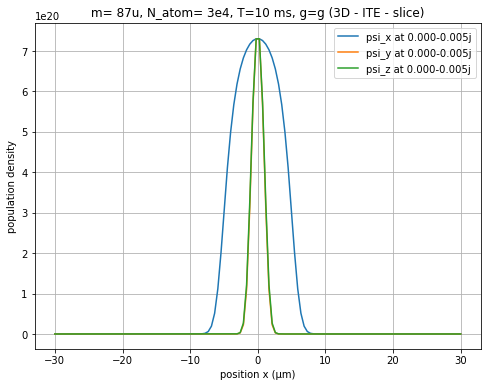

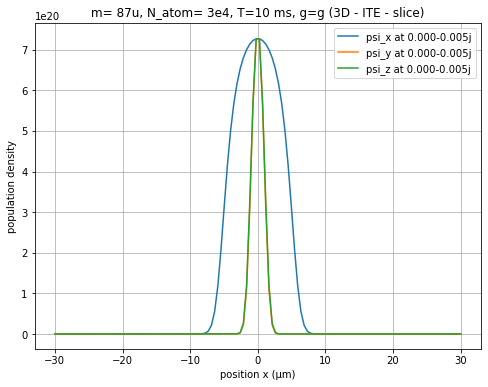

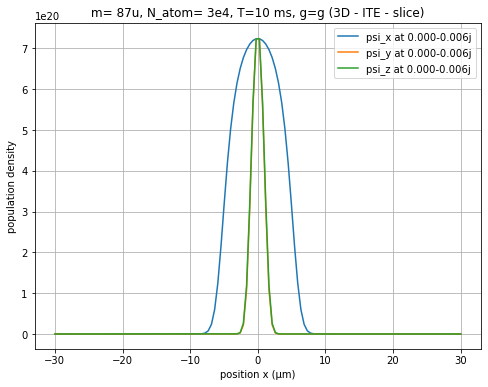

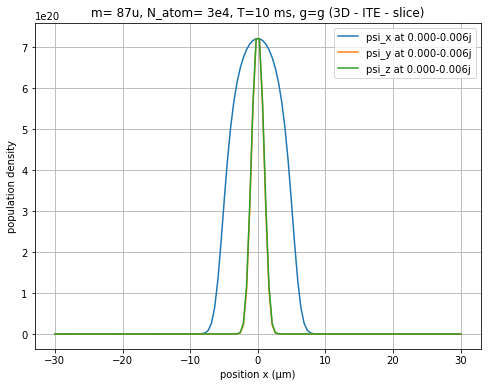

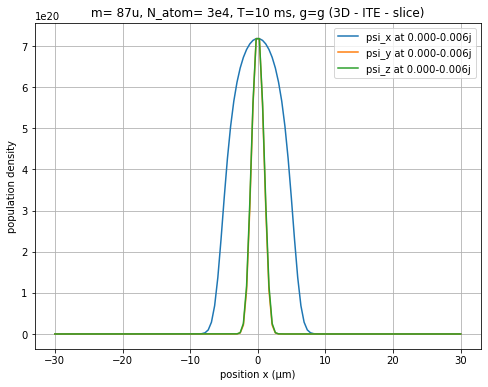

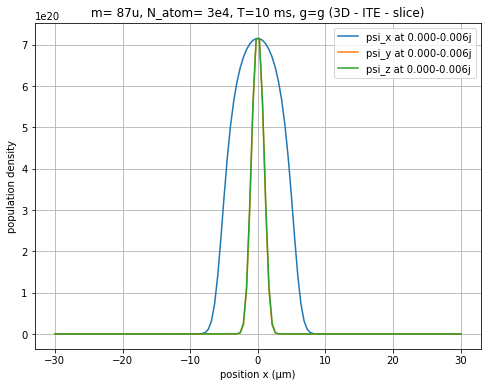

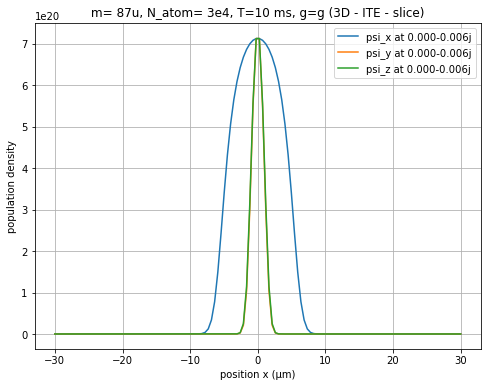

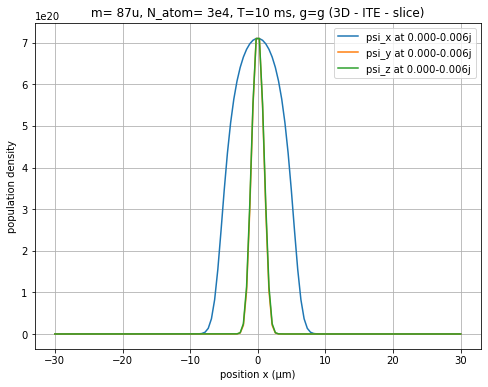

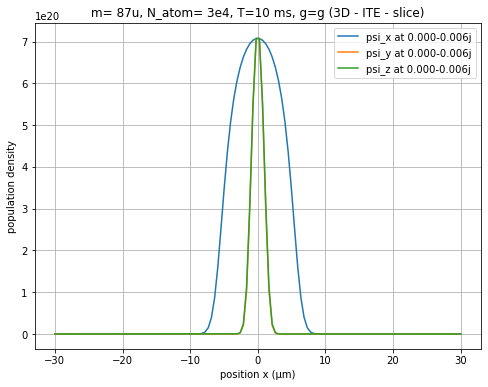

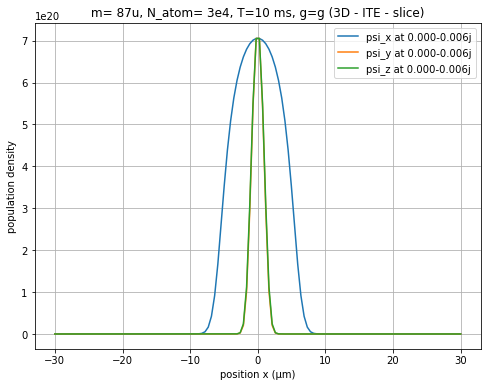

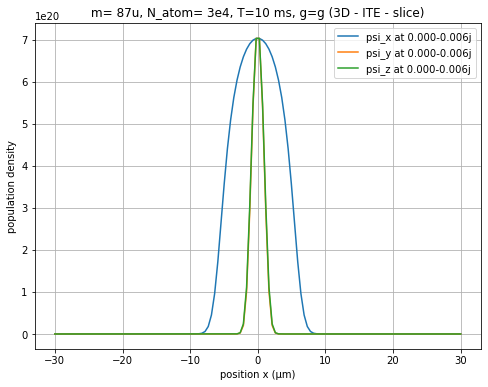

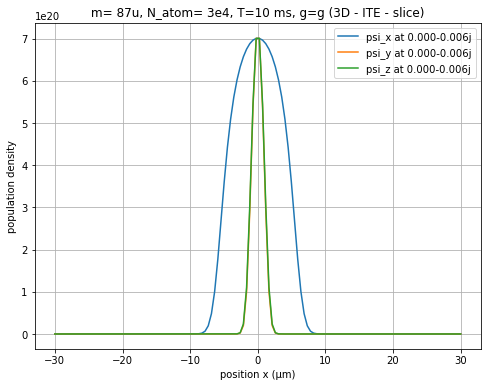

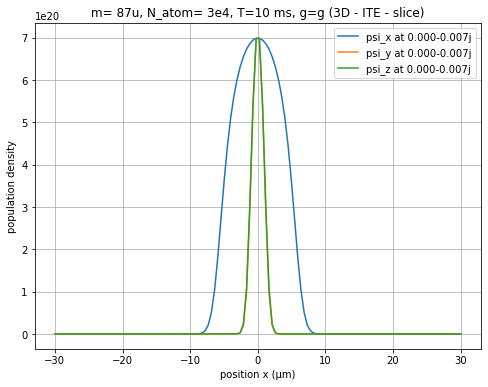

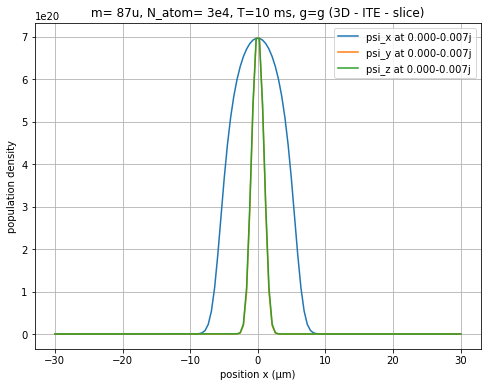

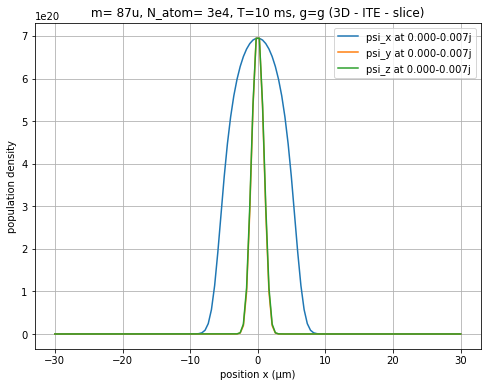

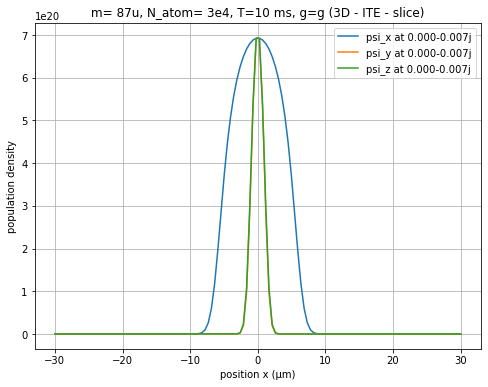

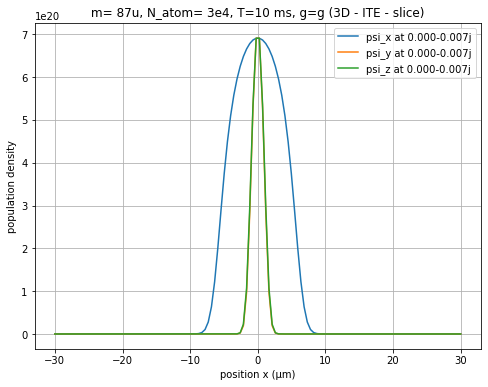

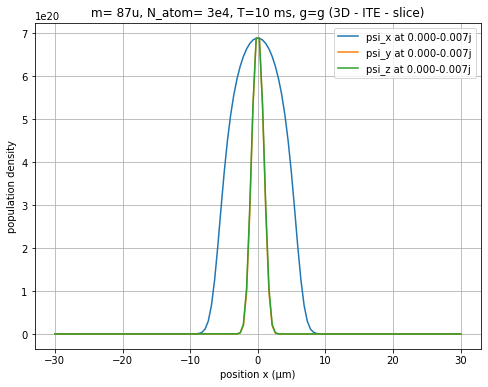

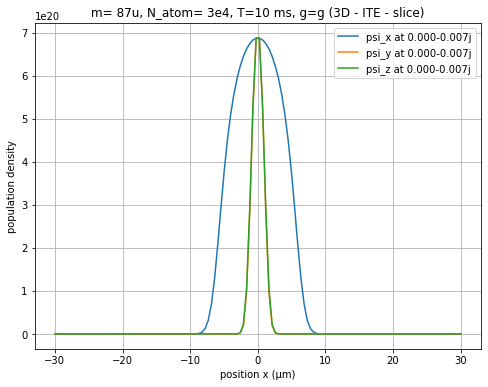

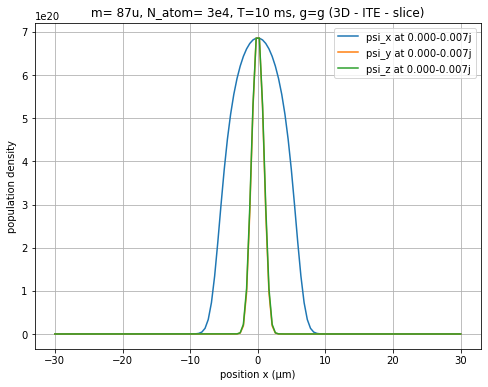

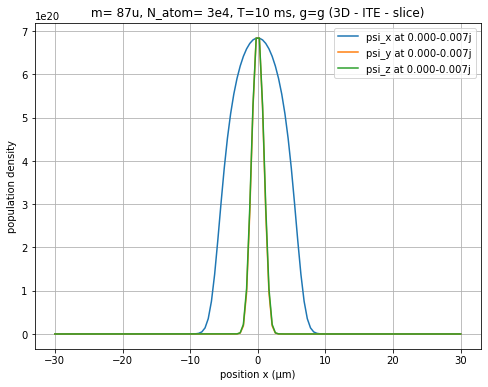

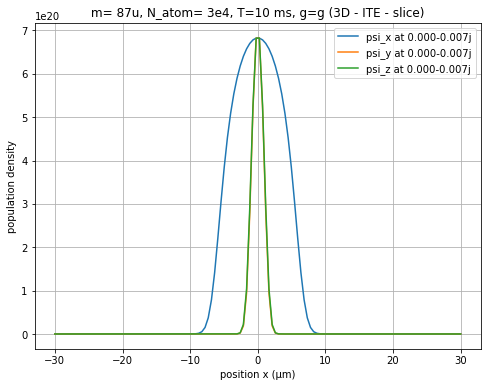

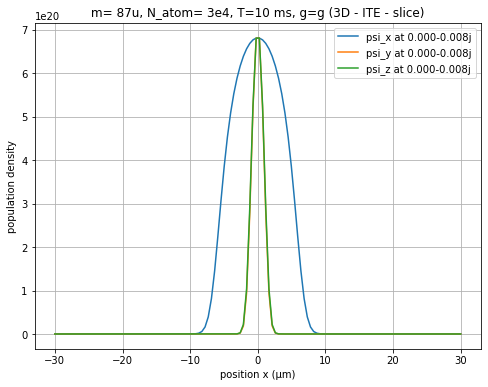

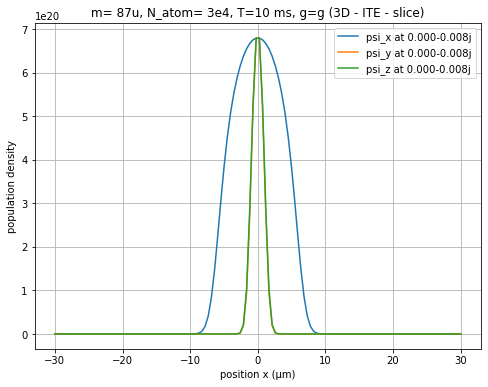

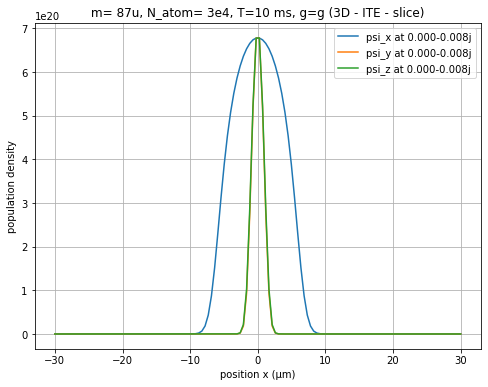

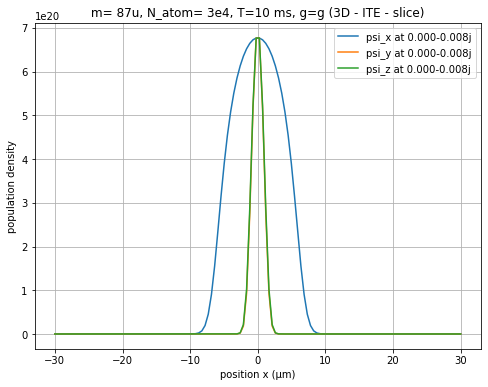

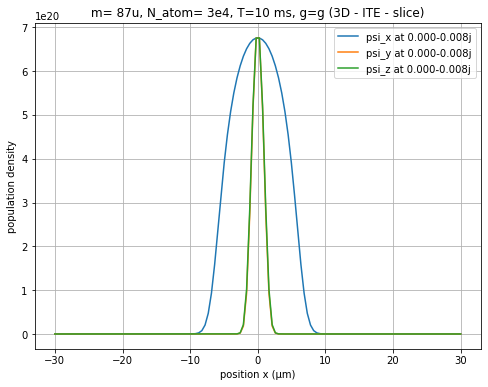

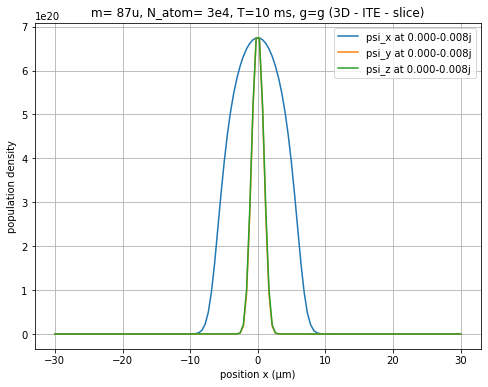

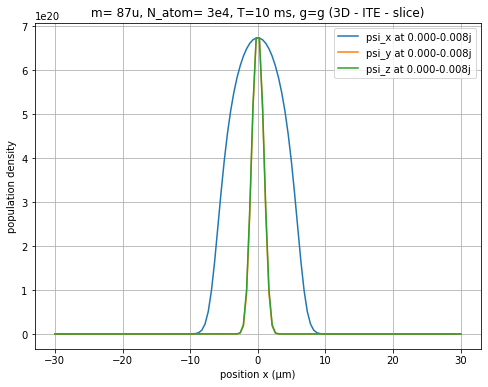

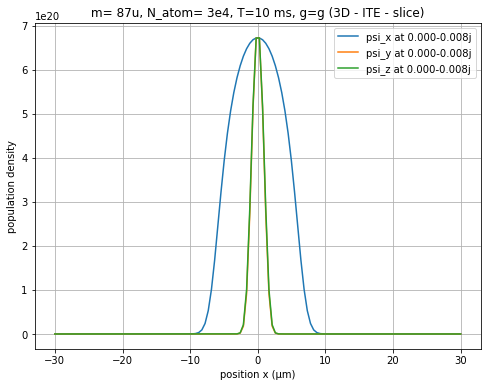

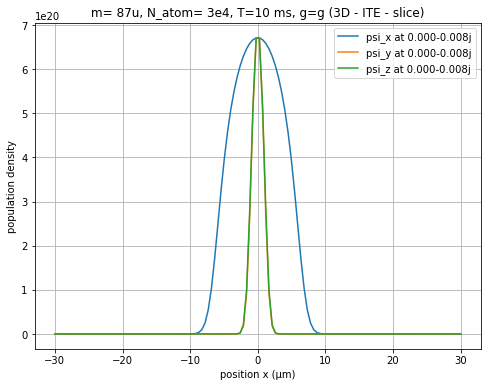

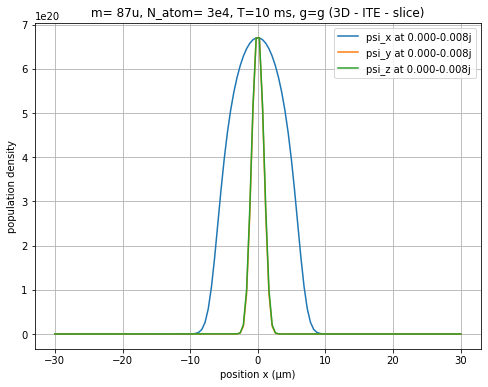

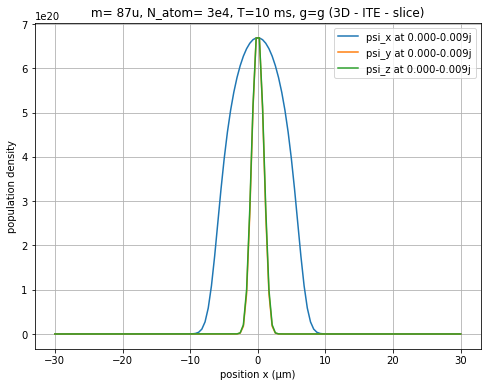

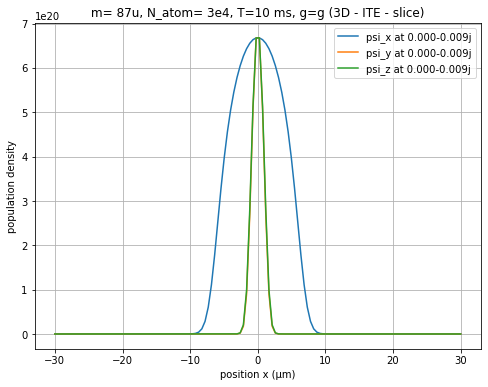

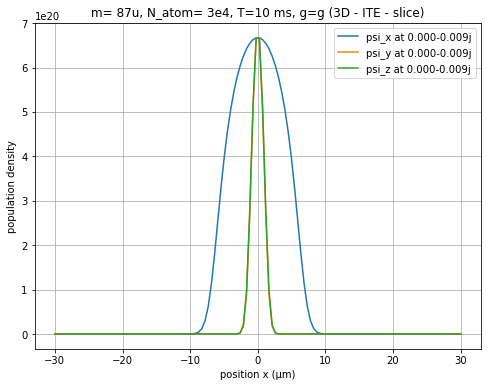

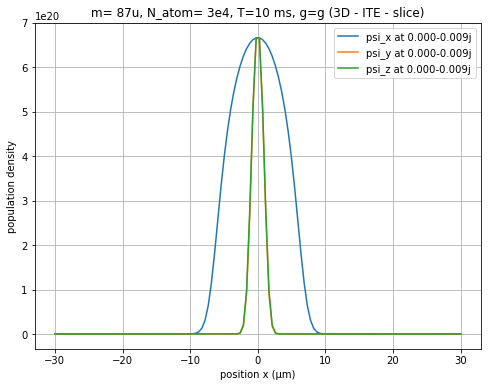

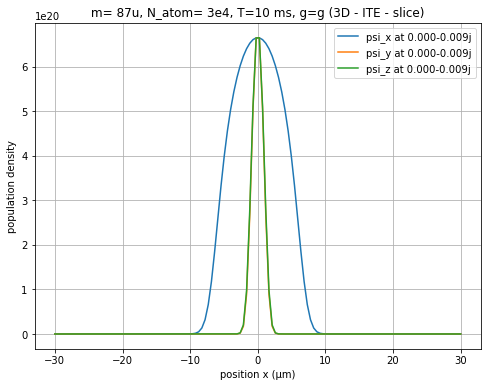

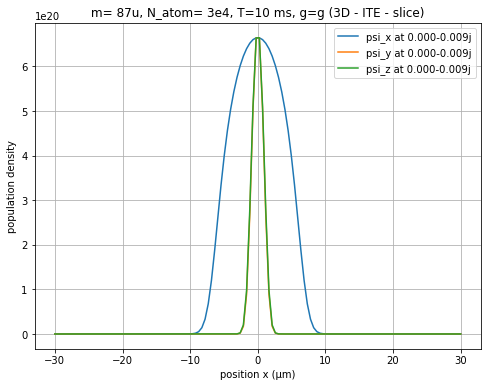

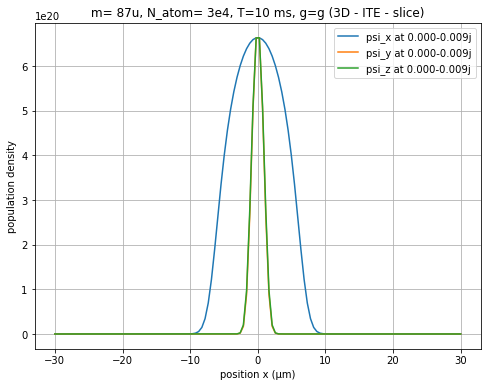

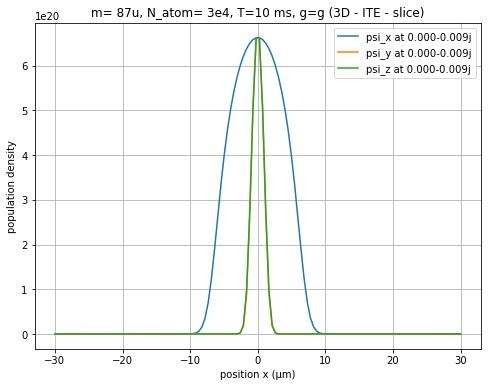

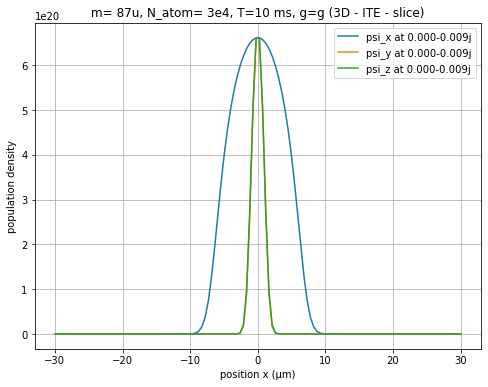

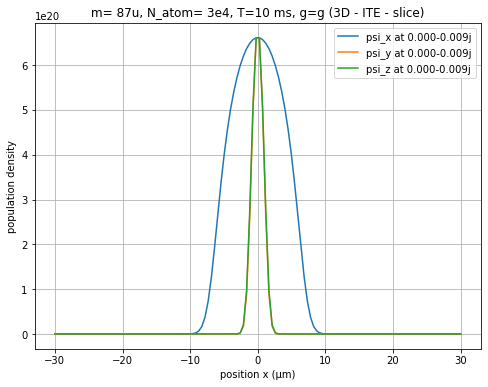

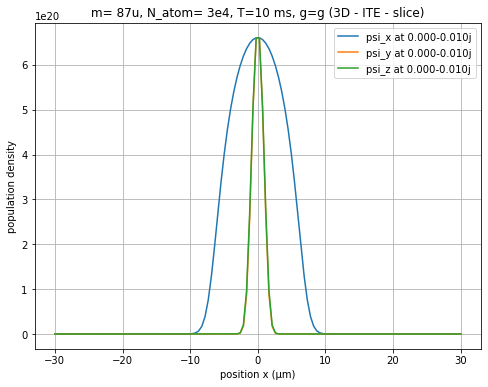

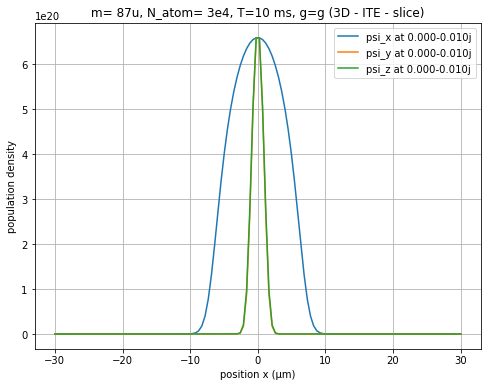

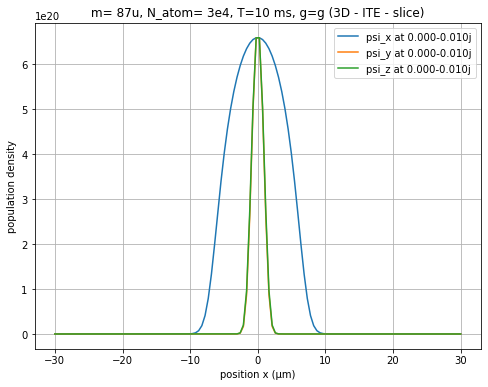

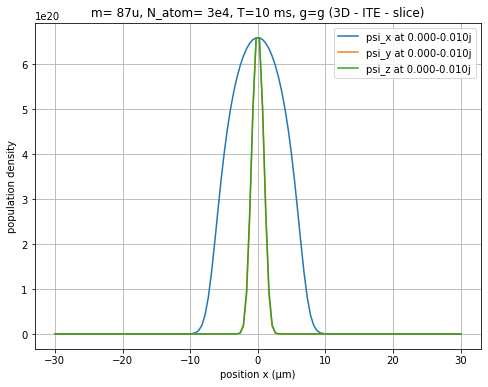

In [8]:
for i in range(100):
    
    # initiate plot
    
    fig, ax = plt.subplots(figsize=(8,6),)
    
    line1, = ax.plot(psi_i.r[0]*1e6, (np.abs(psi_i.amp[:,M,M]))**2, label = 'psi_x at {:.3f}'.format(psi_i.t))
    line2, = ax.plot(psi_i.r[1]*1e6, (np.abs(psi_i.amp[M,:,M]))**2, label = 'psi_y at {:.3f}'.format(psi_i.t))
    line3, = ax.plot(psi_i.r[2]*1e6, (np.abs(psi_i.amp[M,M,:]))**2, label = 'psi_z at {:.3f}'.format(psi_i.t))
    
    
    
    # propagate BEC in a 3D Harmonic potential along with non-linear interaction
    # interaction potential reduced by the order of 6 to iterate & achieve aspect-ration faster
    # this is imaginary time evoulution to have the wave function in ground state
    
    psi_i.propagate("(0.5*m*(omega_x**2*x**2 + omega_y**2*y**2 + omega_z**2*z**2)/hbar) + ((g*abs(psi0)**2)/hbar)", 
                  variables = {'omega_x': 2*np.pi*18,'omega_y': 2*np.pi*131,'omega_z': 2*np.pi*127,'m':m, 'hbar': hbar, 'g': g*1e-6}, 
                  diag = True,  num_time_steps = 1, delta_t= -1j*1e-4)

     
    # normalize wave function to atom number
    psi_i.normalize_to(N)
    
    # update y data for every iteration
    line1.set_ydata((np.abs(psi_i.amp[:,M,M]))**2)
    line2.set_ydata((np.abs(psi_i.amp[M,:,M]))**2)
    line3.set_ydata((np.abs(psi_i.amp[M,M,:]))**2)
   
       
    # update sigma, exp_pos , TOF 
    sigma_x = np.append(sigma_x, np.sqrt(psi_i.var_pos(0)))    
    sigma_y = np.append(sigma_y, np.sqrt(psi_i.var_pos(1)))    
    sigma_z = np.append(sigma_z, np.sqrt(psi_i.var_pos(2))) 
    
    exp_x = np.append(exp_x, psi_i.exp_pos(0))
    exp_y = np.append(exp_y, psi_i.exp_pos(1))
    exp_z = np.append(exp_z, psi_i.exp_pos(2))
    ToF = np.append(ToF, psi_i.t)
    
    
    plt.xlabel("position x (µm)")
    plt.ylabel("population density")
    plt.title(" m= 87u, N_atom= 3e4, T=10 ms, g=g (3D - ITE - slice) ")
    
    plt.grid()
    plt.legend()

# ToF vs <x^2> and ToF vs < x > plots 0 - ITE

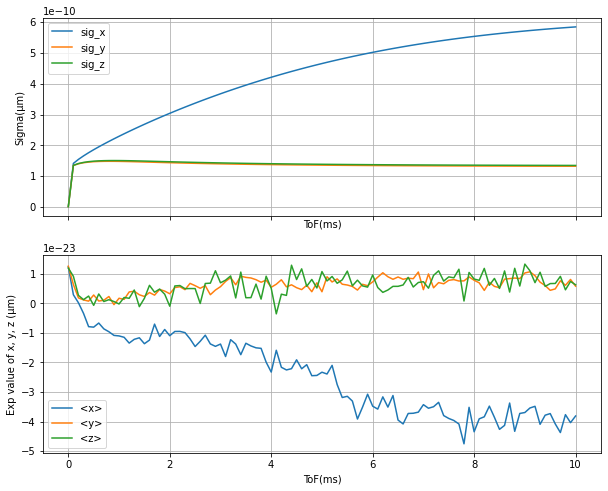

In [9]:
ToF_img = ToF*1j                              # bring the time in the real plane to use in the plot function

fig,(ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8), )
ax1.plot(ToF_img*1000, sigma_x*1e-6, lw = 1.5, label = 'sig_x')
ax1.plot(ToF_img*1000, sigma_y*1e-6, lw = 1.5, label = 'sig_y')
ax1.plot(ToF_img*1000, sigma_z*1e-6, lw = 1.5, label = 'sig_z')

ax2.plot(ToF_img*1000, exp_x*1e-6, lw = 1.5, label = '<x>')
ax2.plot(ToF_img*1000, exp_y*1e-6, lw = 1.5, label = '<y>')
ax2.plot(ToF_img*1000, exp_z*1e-6, lw = 1.5, label = '<z>')


ax1.set_xlabel('ToF(ms)')
ax2.set_xlabel('ToF(ms)')

ax1.set_ylabel('Sigma(µm)')
ax2.set_ylabel('Exp value of x, y, z (µm)')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

# Defining new <x^2> & < x > 

In [10]:
# Defining variance and expected position for the new wave function achieved after ITE 

sigma_x_new = np.array((np.sqrt(psi_i.var_pos(0))))
sigma_y_new = np.array((np.sqrt(psi_i.var_pos(1))))
sigma_z_new = np.array((np.sqrt(psi_i.var_pos(2))))

exp_x_new = np.array(psi_i.exp_pos(0))
exp_y_new = np.array(psi_i.exp_pos(1))
exp_z_new = np.array(psi_i.exp_pos(2))

ToF_new = np.array((0))

In [11]:
sigma_x_new, sigma_y_new, sigma_z_new, ToF_new

(array(0.00058471), array(0.00013212), array(0.00013475), array(0))

# Time evolution of atom cloud with interaction potential only

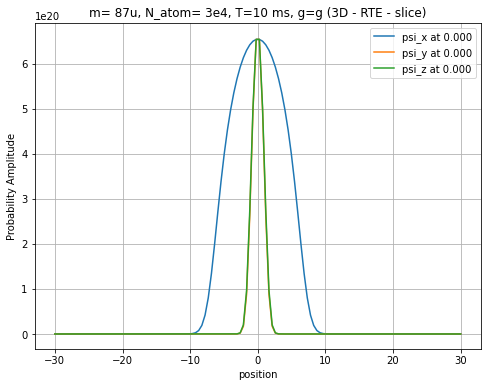

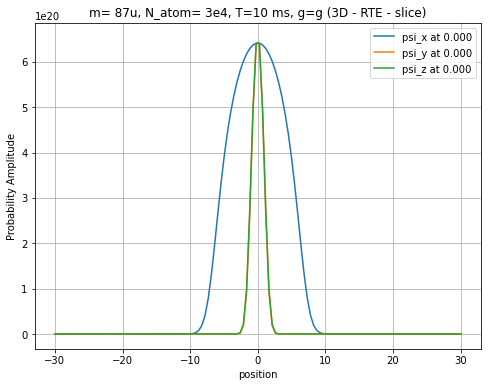

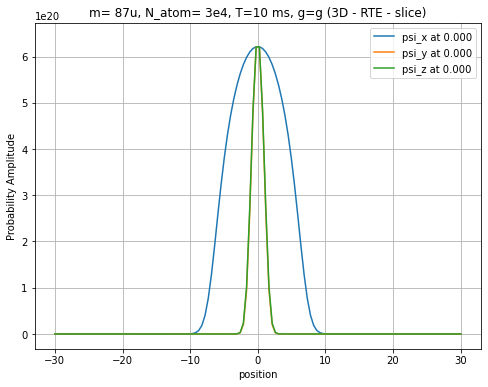

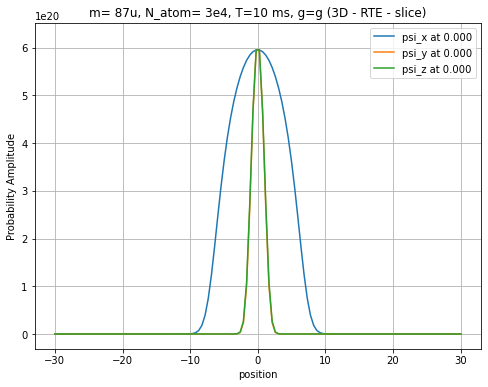

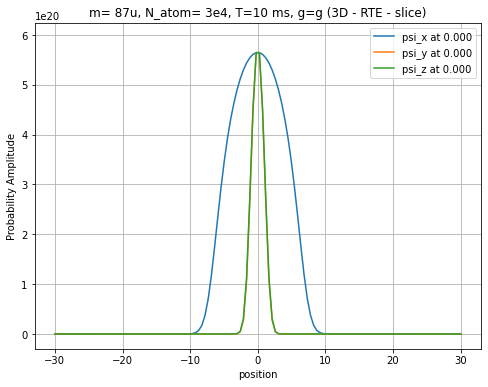

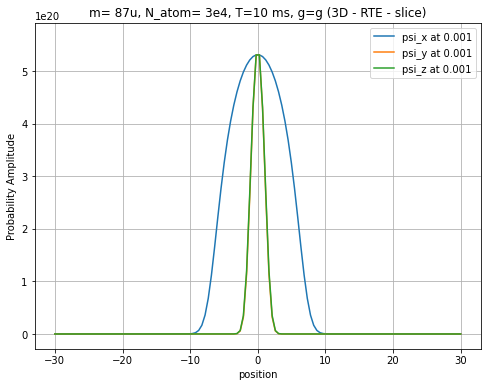

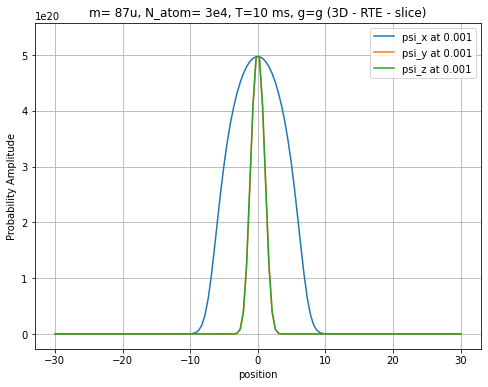

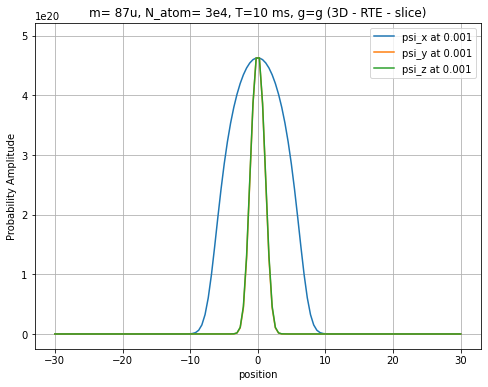

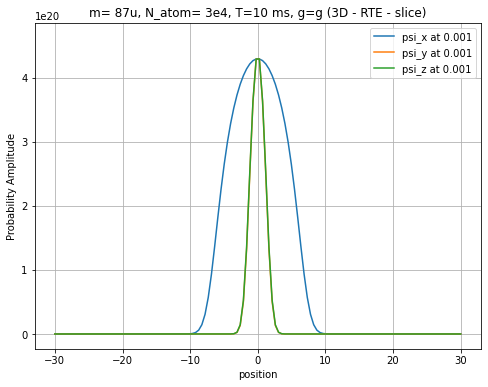

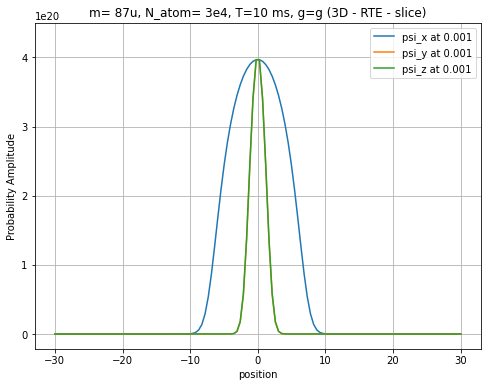

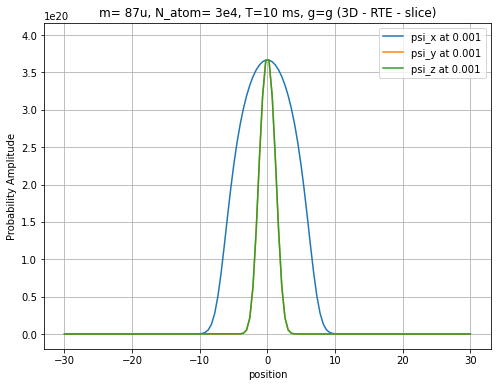

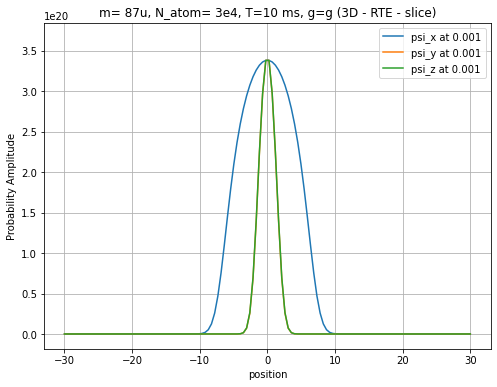

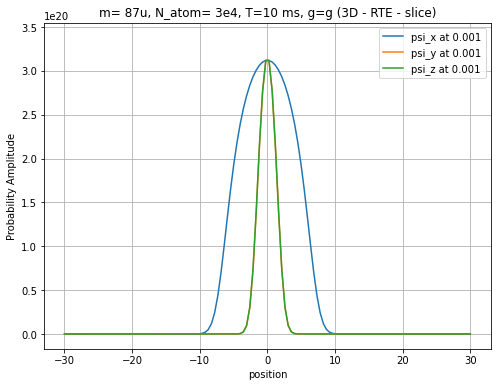

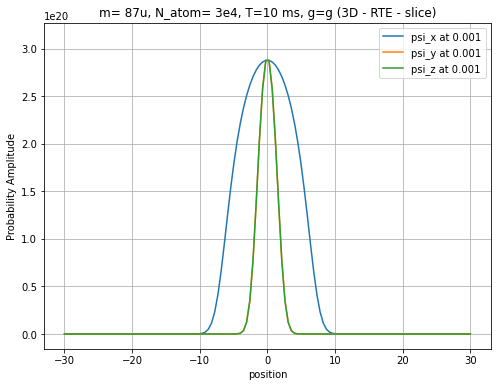

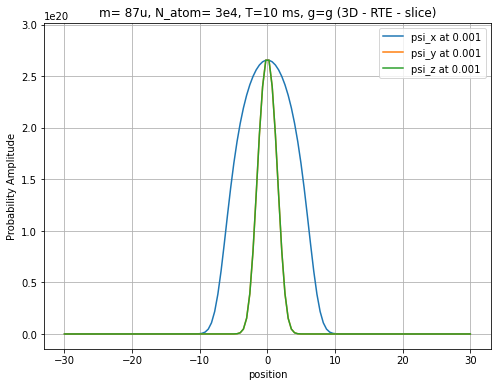

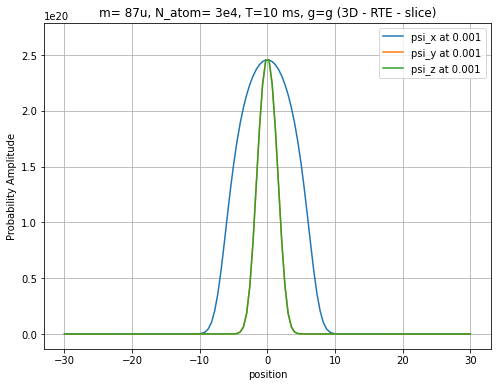

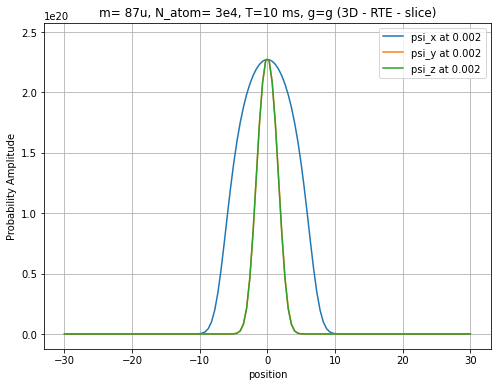

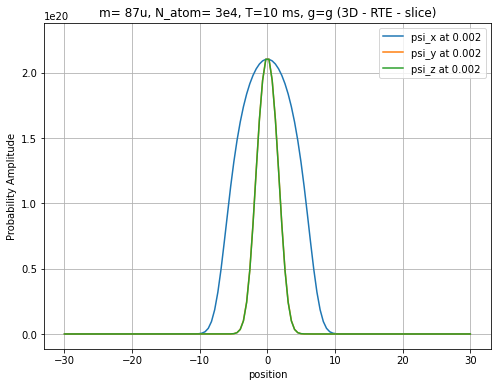

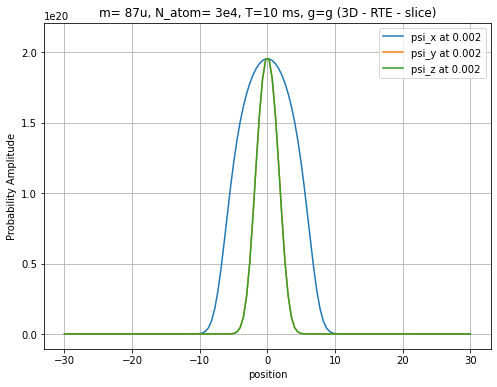

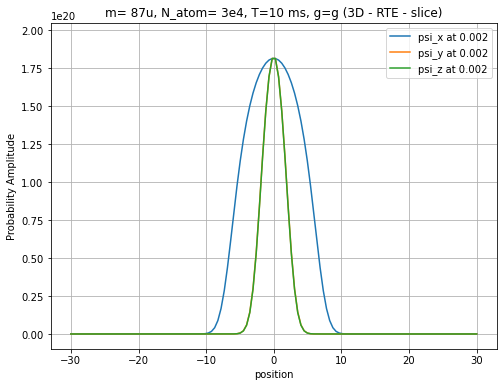

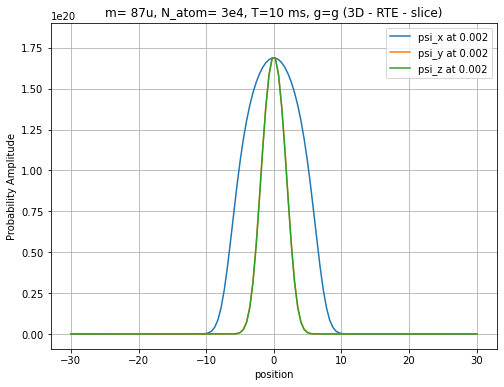

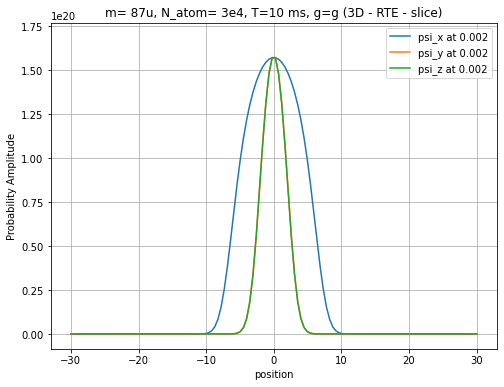

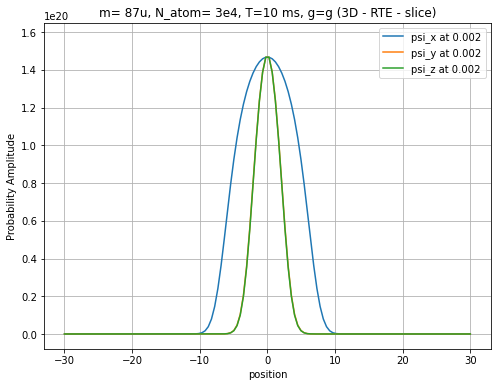

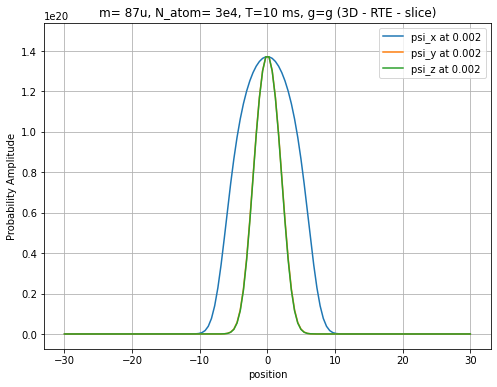

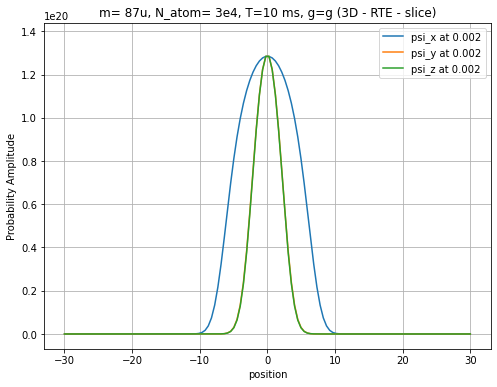

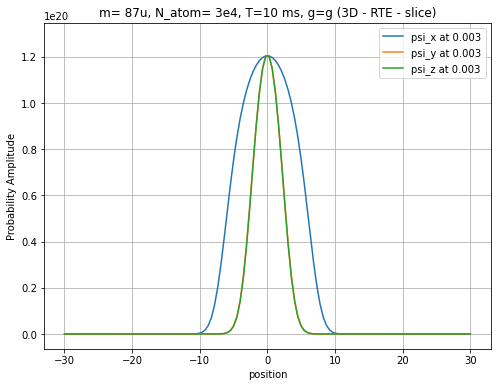

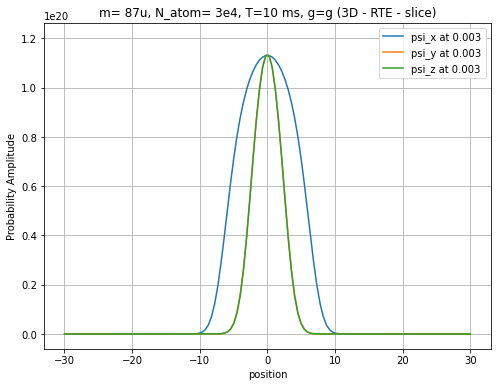

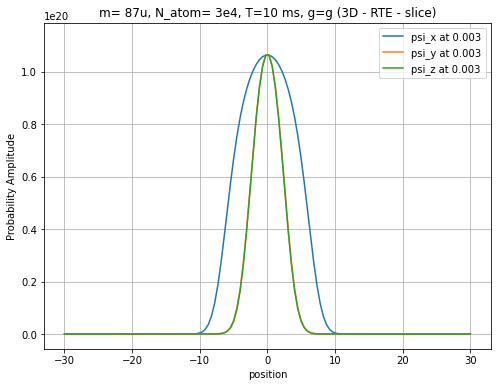

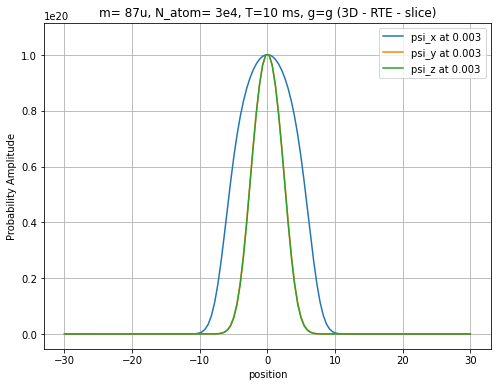

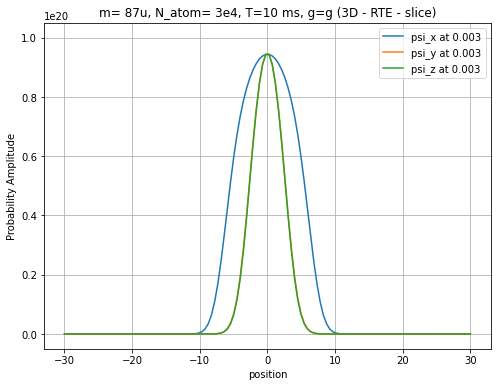

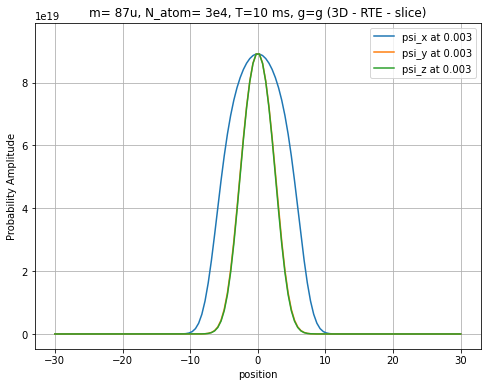

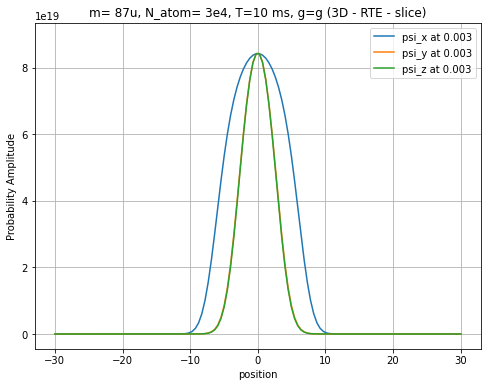

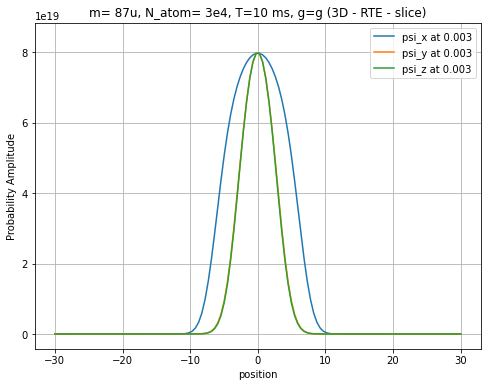

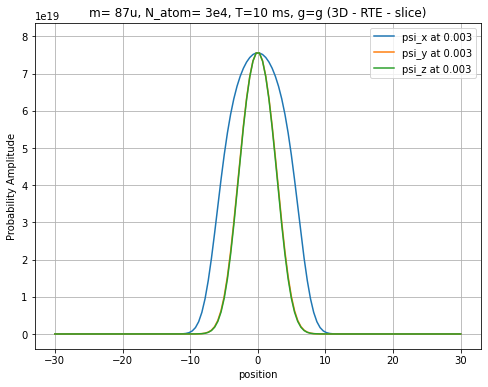

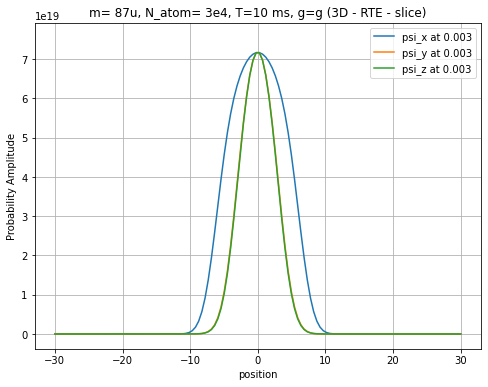

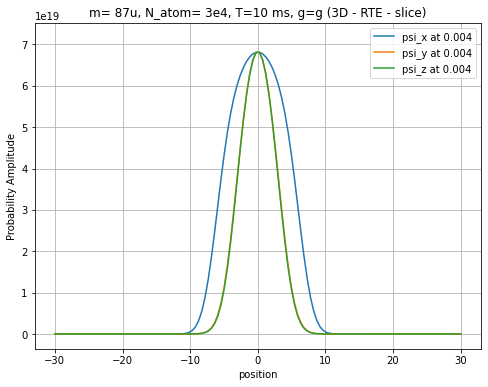

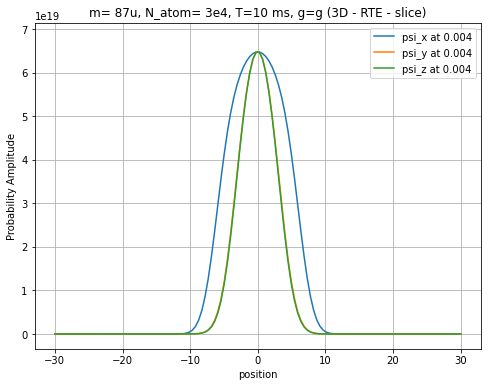

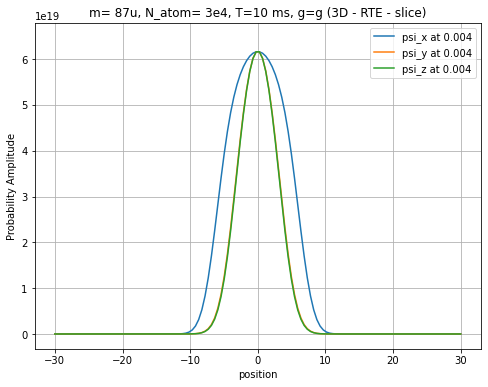

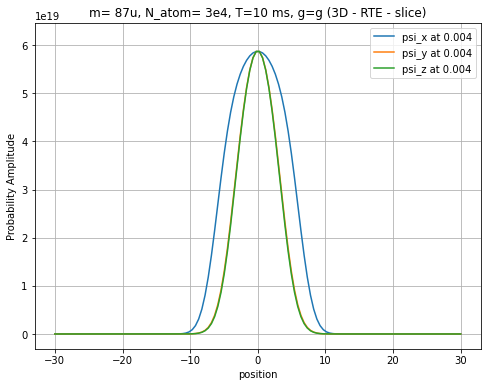

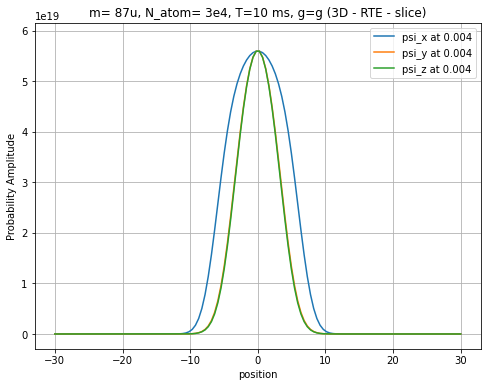

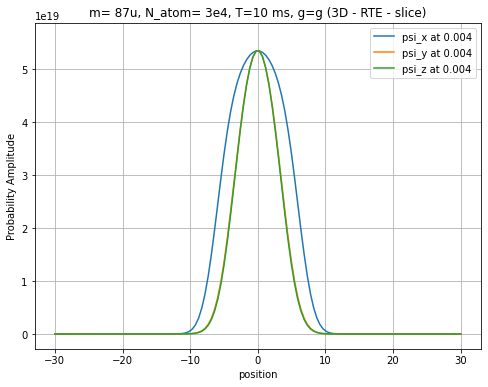

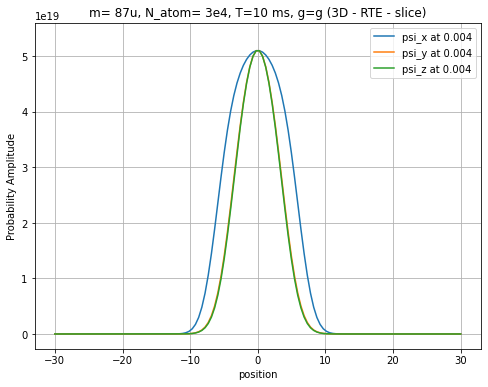

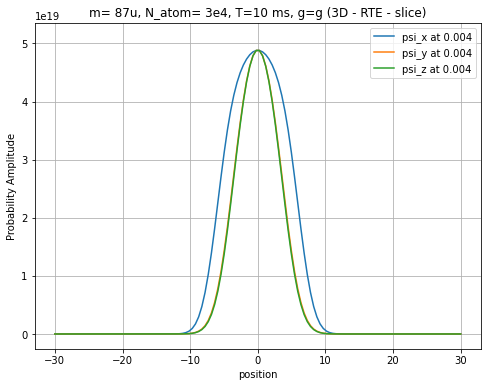

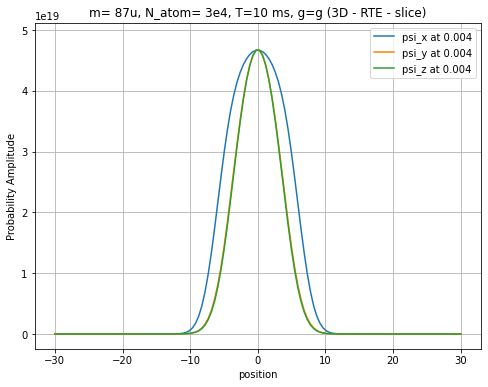

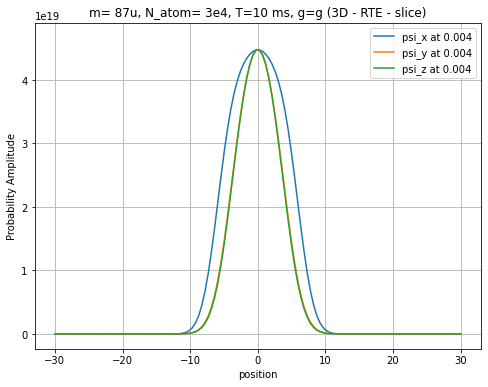

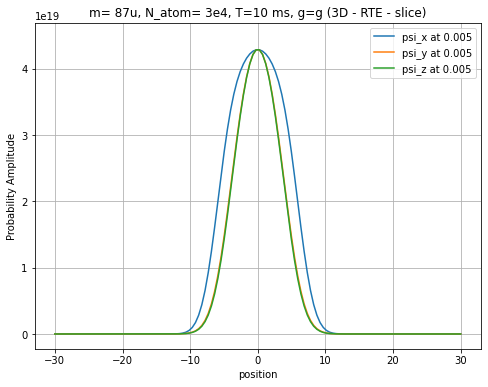

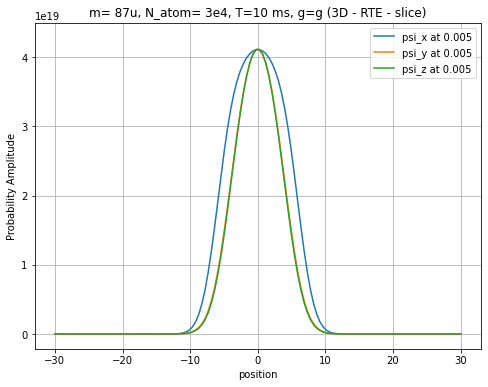

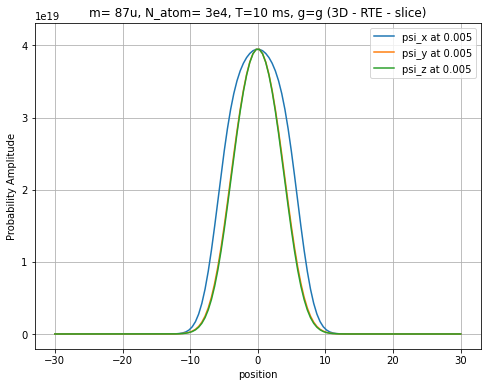

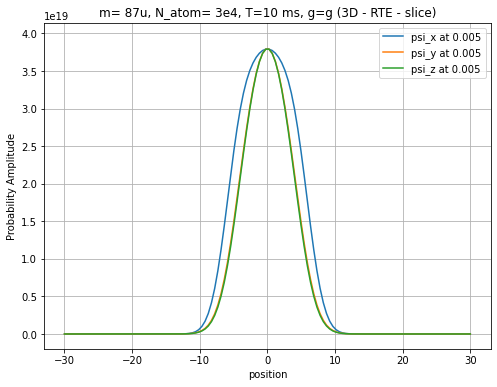

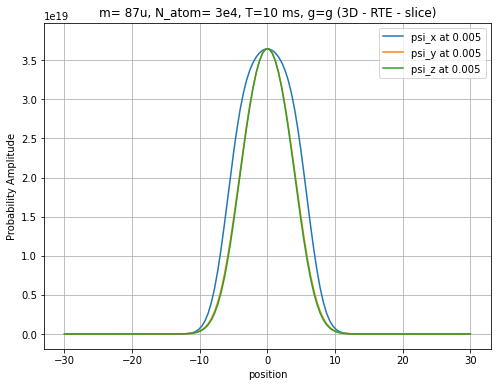

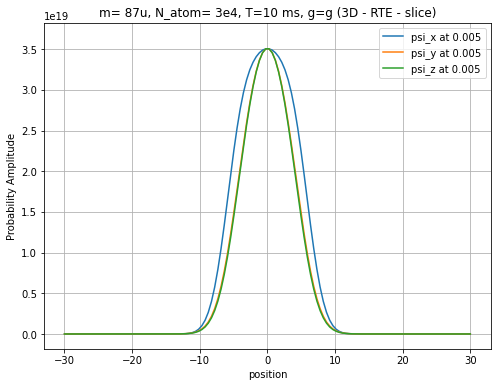

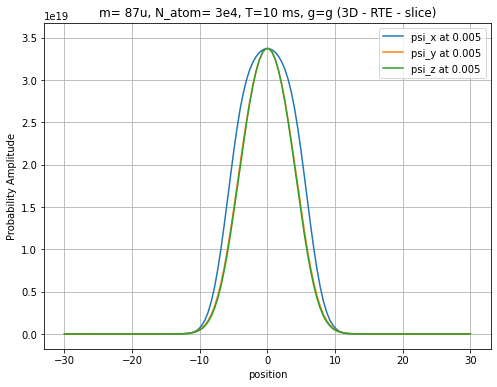

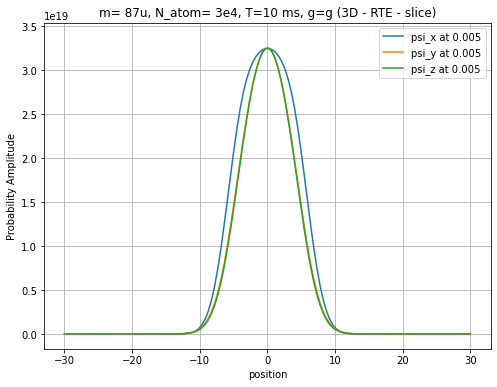

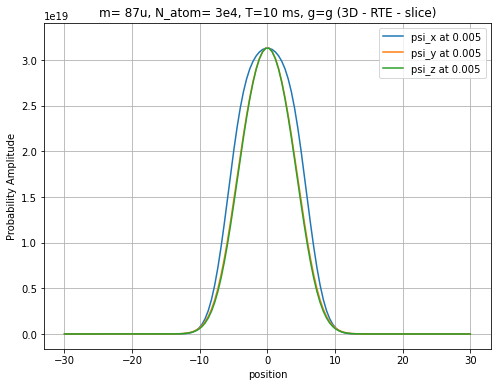

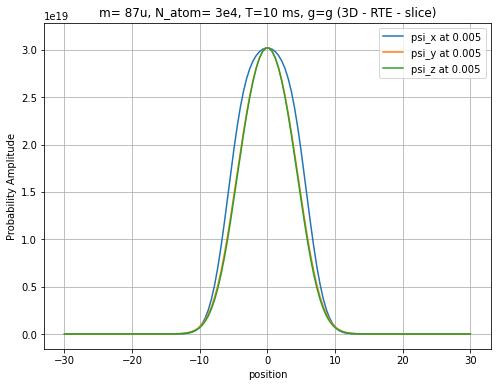

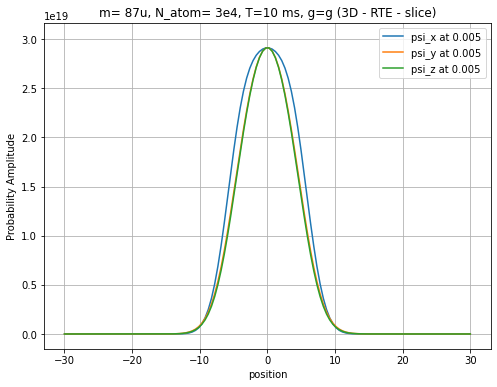

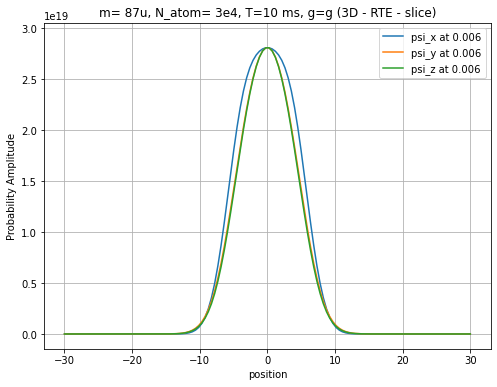

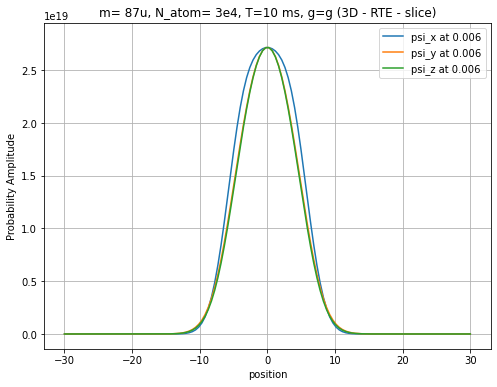

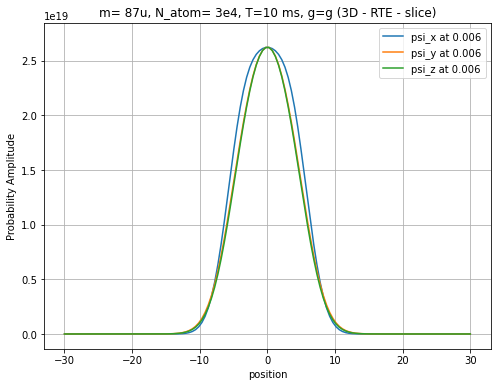

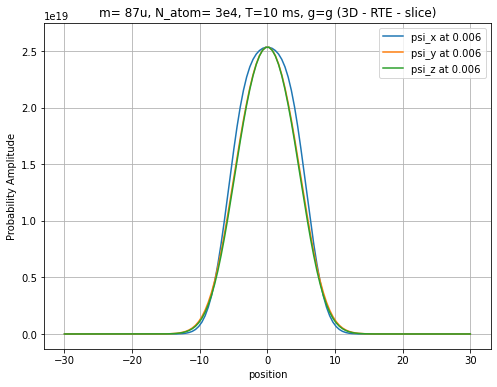

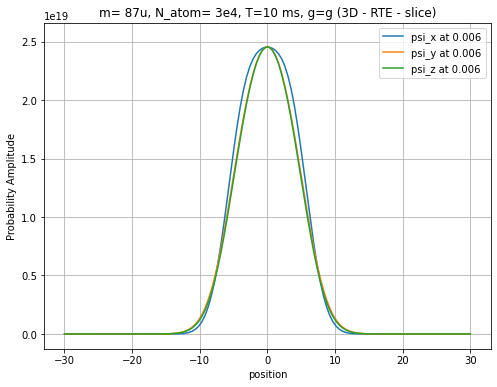

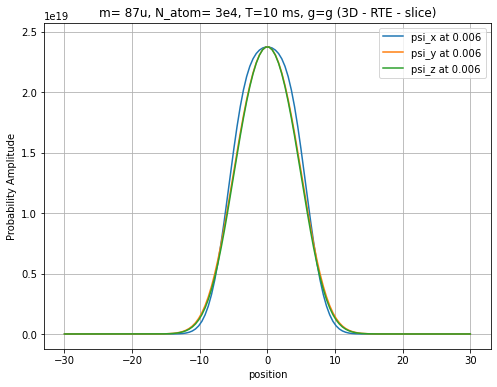

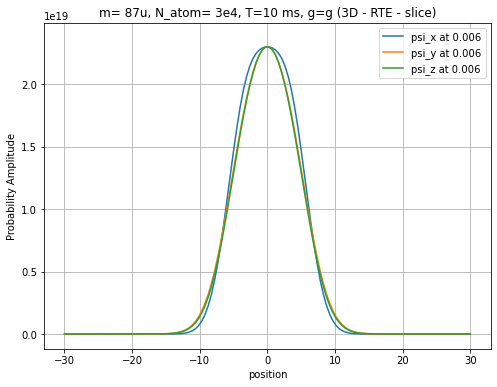

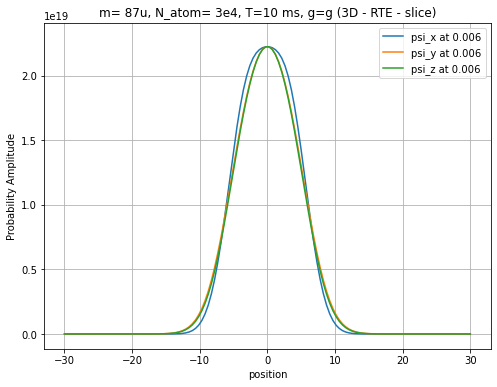

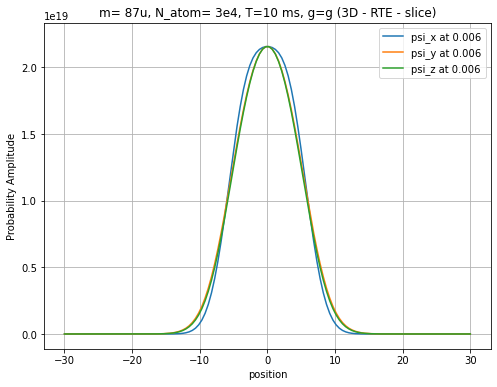

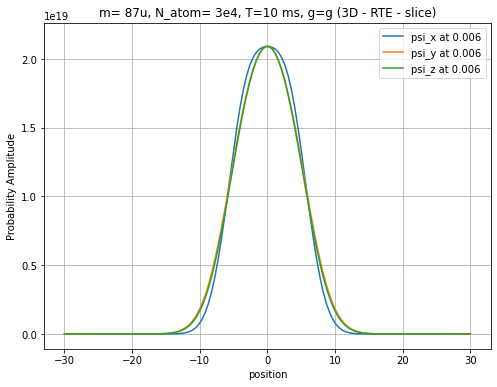

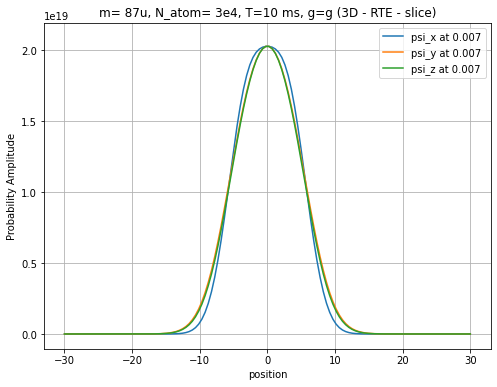

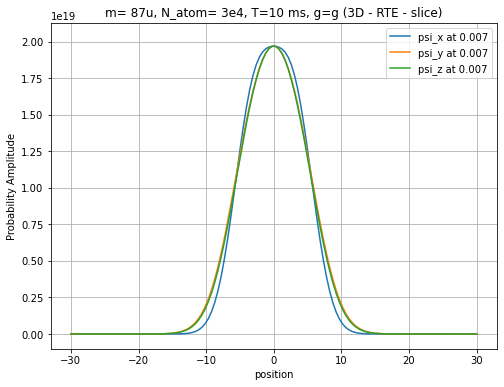

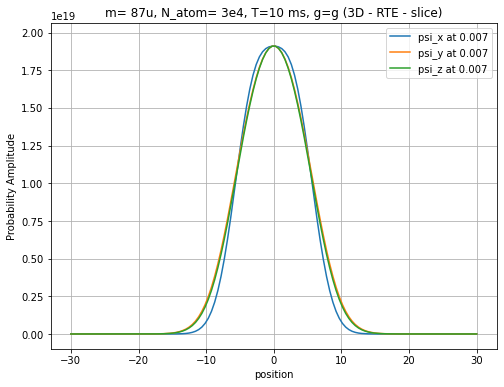

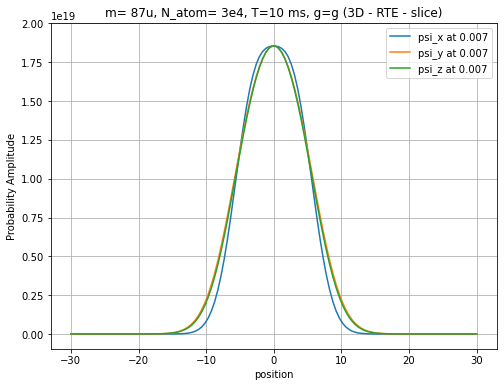

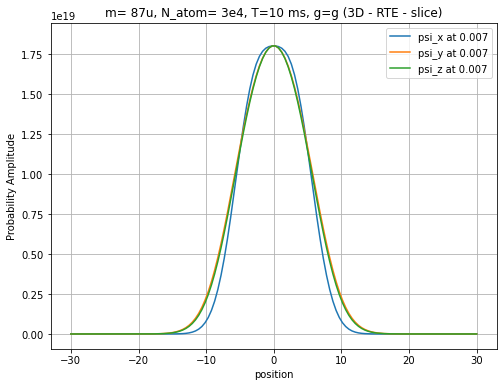

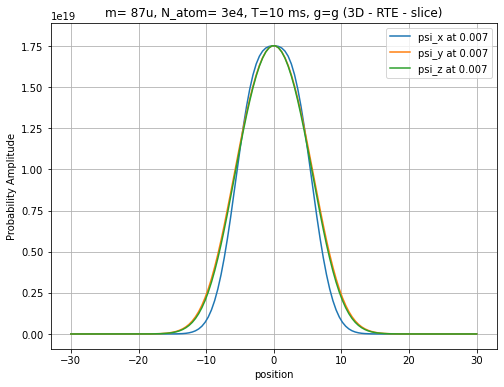

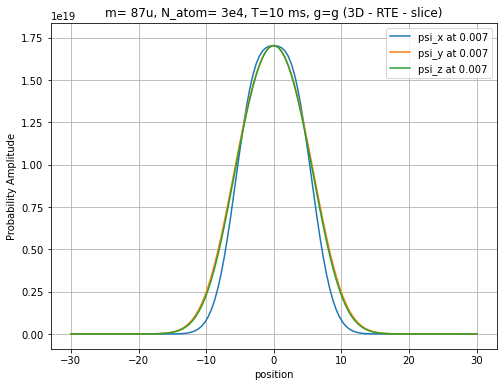

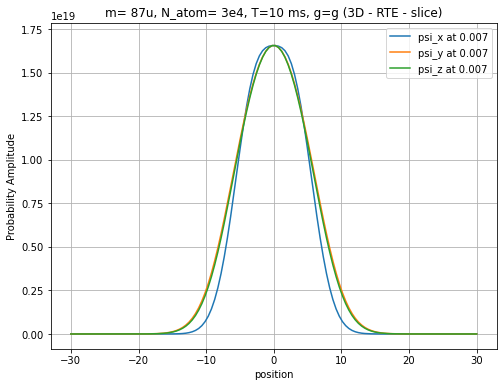

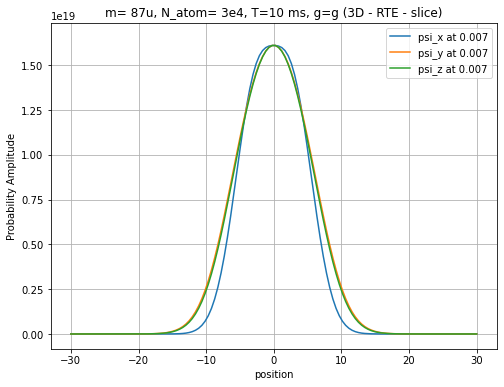

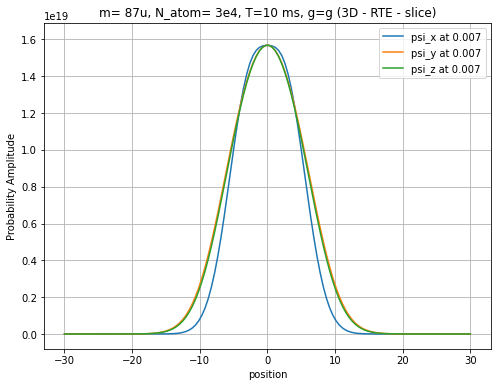

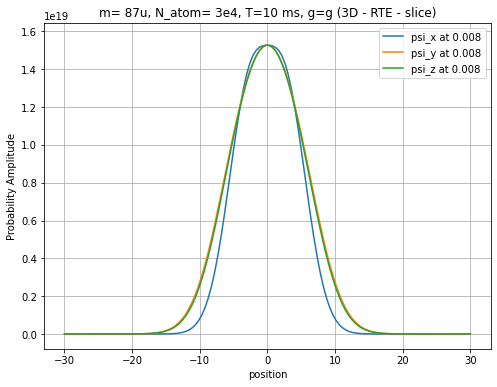

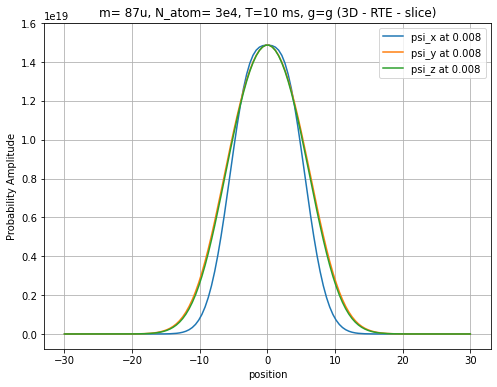

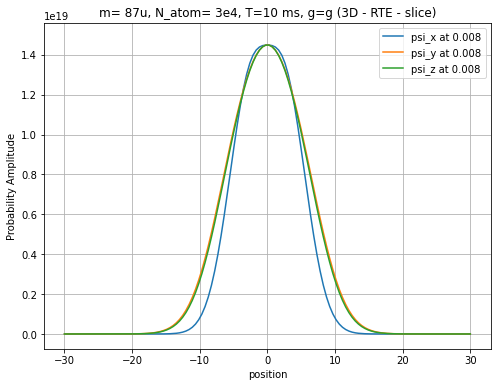

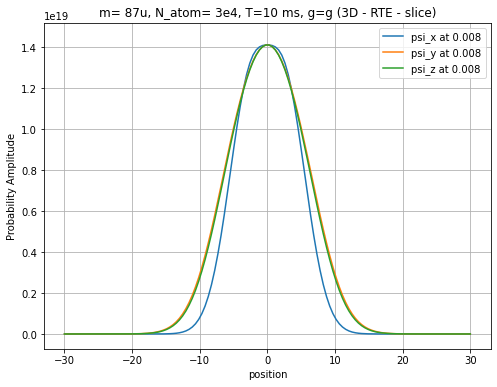

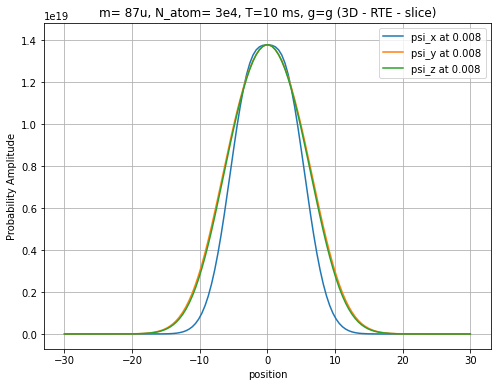

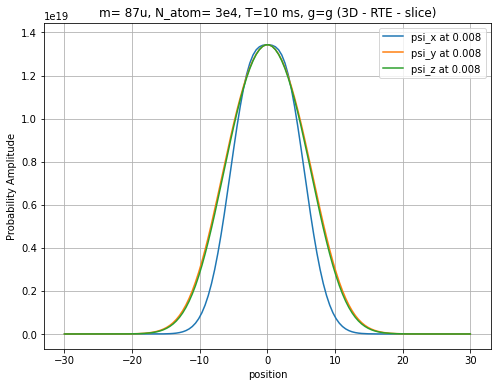

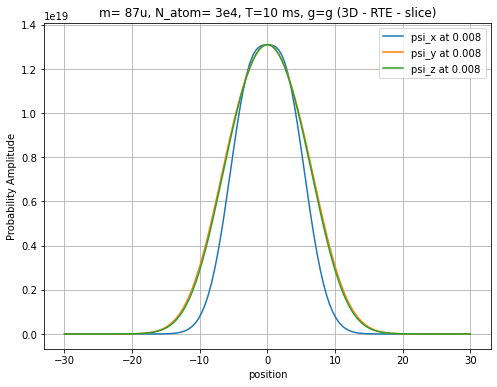

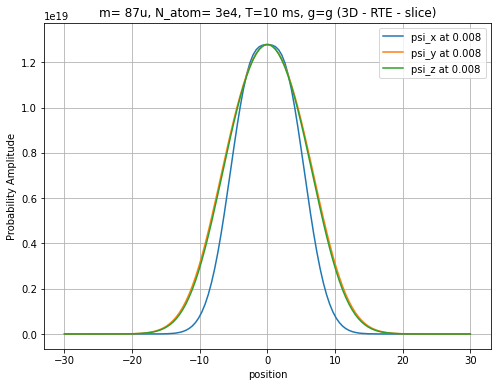

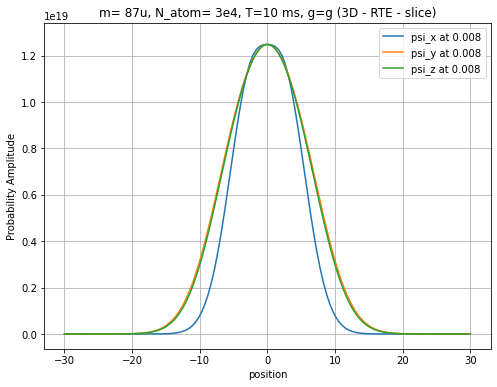

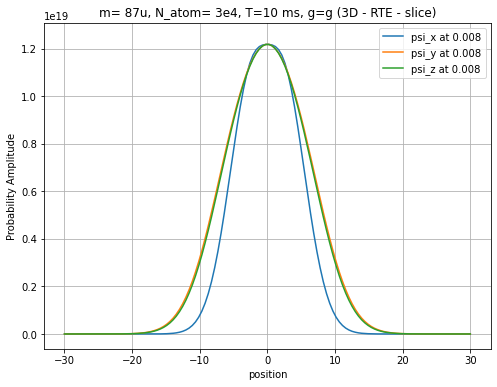

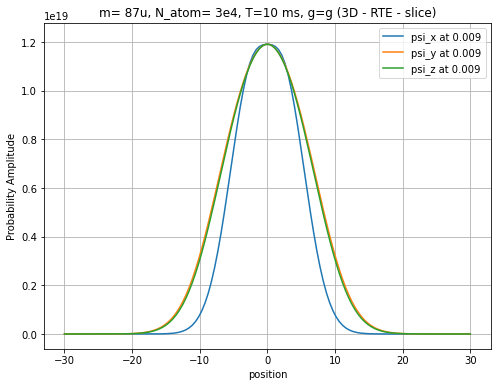

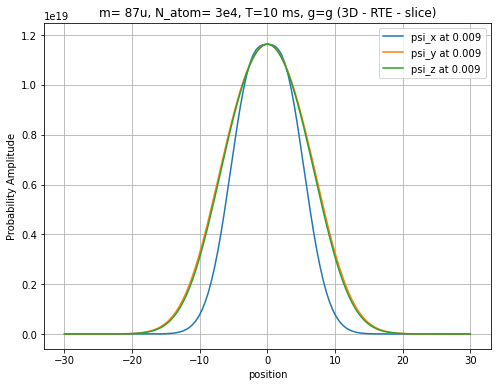

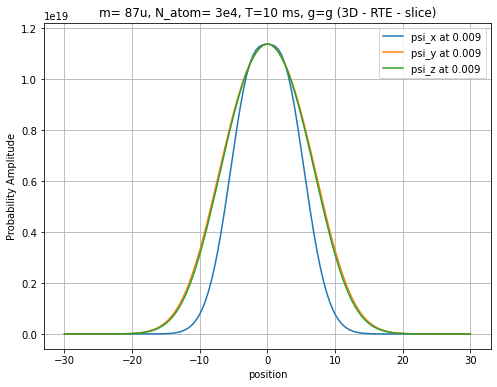

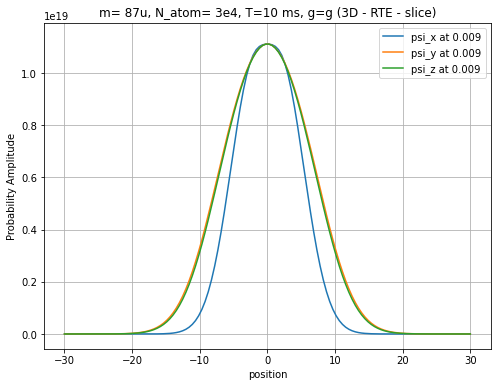

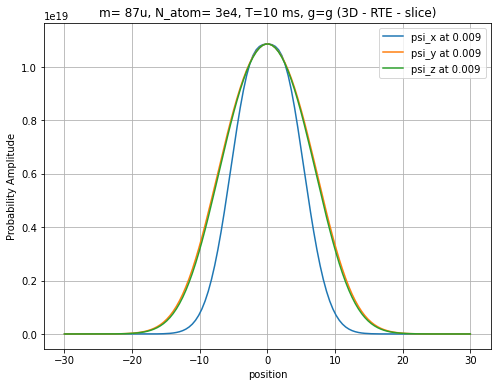

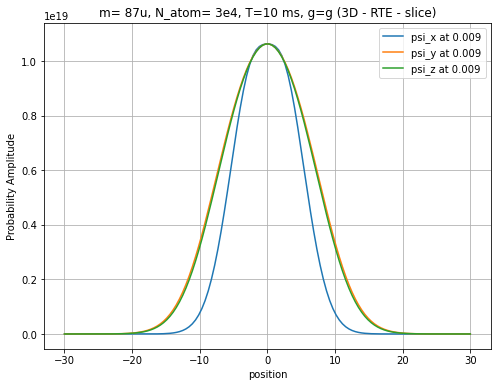

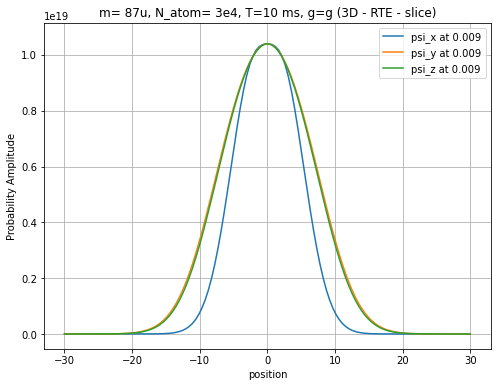

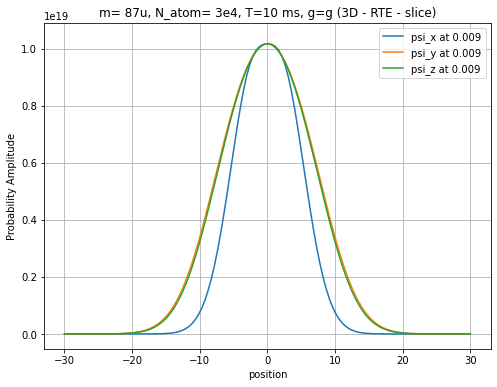

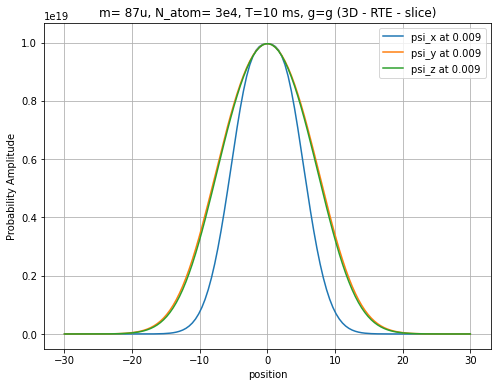

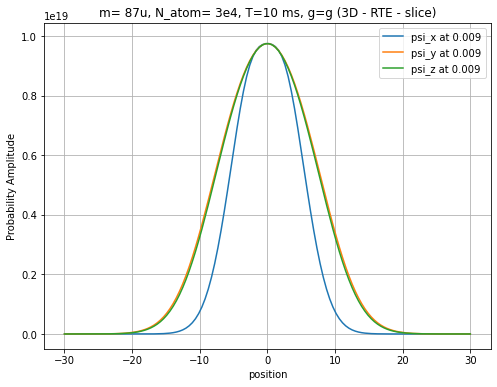

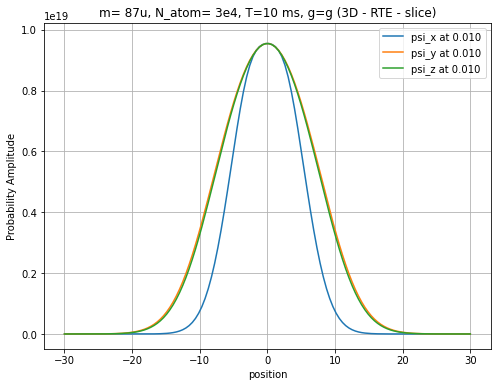

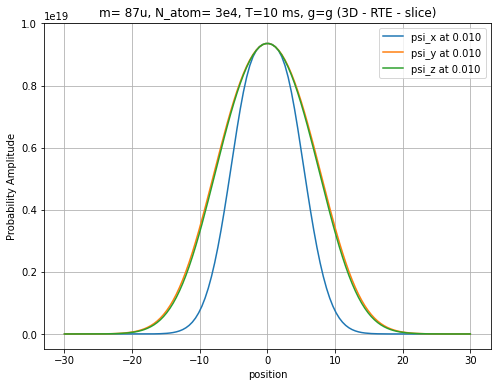

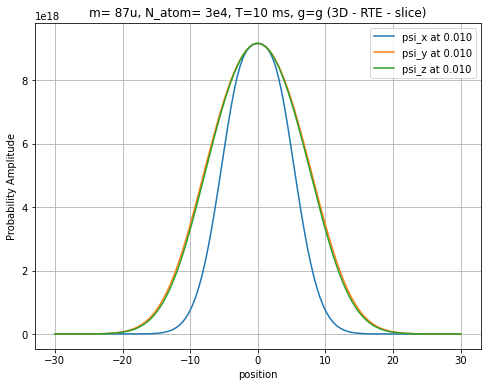

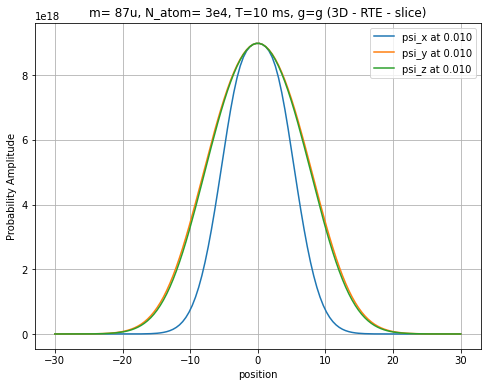

In [12]:
for i in range(100):
    
    # initiate plot
    fig, ax = plt.subplots(figsize=(8,6),)
    
    line1, = ax.plot(psi_i.r[0]*1e6, (np.abs(psi_i.amp[:,M,M]))**2, label = 'psi_x at {:.3f}'.format(np.real(psi_i.t)))
    line2, = ax.plot(psi_i.r[1]*1e6, (np.abs(psi_i.amp[M,:,M]))**2, label = 'psi_y at {:.3f}'.format(np.real(psi_i.t)))
    line3, = ax.plot(psi_i.r[2]*1e6, (np.abs(psi_i.amp[M,M,:]))**2, label = 'psi_z at {:.3f}'.format(np.real(psi_i.t))) 
    
    # propagate BEC in a 3D Harmonic potential along with non-linear interaction
    psi_i.propagate("(g*abs(psi0)**2)/hbar", variables = {'hbar': hbar, 'g': g*1e-6}, 
                    diag = True, num_time_steps = 1, delta_t= 1e-4)

    
    # normalize psi
    psi_i.normalize_to(N)
    
    # update y data for every iteration
    line1.set_ydata((np.abs(psi_i.amp[:,M,M]))**2)
    line2.set_ydata((np.abs(psi_i.amp[M,:,M]))**2)
    line3.set_ydata((np.abs(psi_i.amp[M,M,:]))**2)
      
       
    # update sigma, exp_pos , TOF 
    sigma_x_new = np.append(sigma_x_new, np.sqrt(psi_i.var_pos(0)))    
    sigma_y_new = np.append(sigma_y_new, np.sqrt(psi_i.var_pos(1)))    
    sigma_z_new = np.append(sigma_z_new, np.sqrt(psi_i.var_pos(2))) 
    
    exp_x_new = np.append(exp_x_new, psi_i.exp_pos(0))
    exp_y_new = np.append(exp_y_new, psi_i.exp_pos(1))
    exp_z_new = np.append(exp_z_new, psi_i.exp_pos(2))
    ToF_new = np.append(ToF_new, psi_i.t)
    
    
    plt.xlabel("position")
    plt.ylabel("Probability Amplitude")
    plt.title("m= 87u, N_atom= 3e4, T=10 ms, g=g (3D - RTE - slice)")
    plt.grid()
    plt.legend()

# ToF vs <x^2> and ToF vs < x > plots 0 - RTE

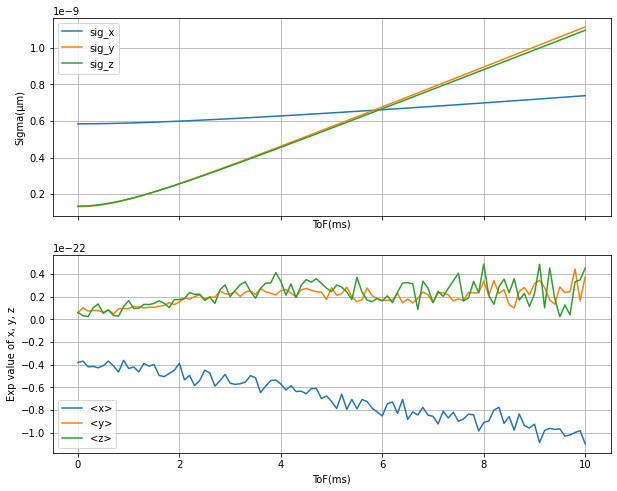

In [13]:
ToF_real = np.real(ToF_new)

fig,(ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8), )

ax1.plot(ToF_real*1000, sigma_x_new*1e-6, lw = 1.5, label = 'sig_x')
ax1.plot(ToF_real*1000, sigma_y_new*1e-6, lw = 1.5, label = 'sig_y')
ax1.plot(ToF_real*1000, sigma_z_new*1e-6, lw = 1.5, label = 'sig_z')

ax2.plot(ToF_real*1000, exp_x_new*1e-6, lw = 1.5, label = '<x>')
ax2.plot(ToF_real*1000, exp_y_new*1e-6, lw = 1.5, label = '<y>')
ax2.plot(ToF_real*1000, exp_z_new*1e-6, lw = 1.5, label = '<z>')


ax1.set_xlabel('ToF(ms)')
ax2.set_xlabel('ToF(ms)')

ax1.set_ylabel('Sigma(µm)')
ax2.set_ylabel('Exp value of x, y, z')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

# Animations

Animations can also be used to visualize the propagation of the wavefunction in a dynamical way.

In [ ]:
def init():
    return (line1, line2, line3)

def animate(i):
     
    psi_i.propagate("(0.5*m*(omega_x**2*x**2 + omega_y**2*y**2 + omega_z**2*z**2)/hbar) + ((g*abs(psi0)**2)/hbar)", 
                  variables = {'omega_x': 2*np.pi*18,'omega_y': 2*np.pi*131,'omega_z': 2*np.pi*127,'m':m, 'hbar': hbar, 'g': g*1e-6}, 
                  diag = True,  num_time_steps = 1, delta_t= -1j*1e-4)
    
    psi_i.normalize_to(N)
    
    line1.set_ydata((np.abs(psi_i.amp[:,M,M]))**2)
    line2.set_ydata((np.abs(psi_i.amp[M,:,M]))**2)
    line3.set_ydata((np.abs(psi_i.amp[M,M,:]))**2)

    return (line1, line2, line3)

fig, ax = plt.subplots()

line1, = ax.plot(psi_i.r[0]*1e6, (np.abs(psi_i.amp[:,M,M]))**2, label = 'psi_x at {:.3f}'.format(psi_i.t))
line2, = ax.plot(psi_i.r[1]*1e6, (np.abs(psi_i.amp[M,:,M]))**2, label = 'psi_y at {:.3f}'.format(psi_i.t))
line3, = ax.plot(psi_i.r[2]*1e6, (np.abs(psi_i.amp[M,M,:]))**2, label = 'psi_z at {:.3f}'.format(psi_i.t))


ax.grid()
ax.legend()

ax.set_xlabel("position x (µm)")
ax.set_ylabel("population density")
ax.set_title(" m= 87u, N_atom= 3e4, T=10 ms, g=g (3D - ITE) ")


anim = animation.FuncAnimation(fig, animate, init_func = init,
                               frames = 100, interval = 100, blit = False)

# f = '3D_AHT_ITE.mp4'
# writervideo = animation.FFMpegWriter(fps=60) 
# anim.save(f, writer=writervideo)


plt.close()
HTML(anim.to_html5_video())

In [ ]:
def init():
    return (line1, line2, line3)

def animate(i):
     
    psi_i.propagate("(g*abs(psi0)**2)/hbar", variables = {'hbar': hbar, 'g': g*1e-6}, 
                    diag = True, num_time_steps = 1, delta_t= 1e-4)
    
    psi_i.normalize_to(N)
    
    line1.set_ydata((np.abs(psi_i.amp[:,M,M]))**2)
    line2.set_ydata((np.abs(psi_i.amp[M,:,M]))**2)
    line3.set_ydata((np.abs(psi_i.amp[M,M,:]))**2)
    
    
    return (line2,)

fig, ax = plt.subplots()

line1, = ax.plot(psi_i.r[0]*1e6, (np.abs(psi_i.amp[:,M,M]))**2, label = 'psi_x at {:.3f}'.format(np.real(psi_i.t)))
line2, = ax.plot(psi_i.r[1]*1e6, (np.abs(psi_i.amp[M,:,M]))**2, label = 'psi_y at {:.3f}'.format(np.real(psi_i.t)))
line3, = ax.plot(psi_i.r[2]*1e6, (np.abs(psi_i.amp[M,M,:]))**2, label = 'psi_z at {:.3f}'.format(np.real(psi_i.t)))

ax.grid()
ax.legend()

ax.set_xlabel("position x (µm)")
ax.set_ylabel("population density")
ax.set_title(" m= 87u, N_atom= 3e4, T=10 ms, g=g (3D - RTE) ")


anim = animation.FuncAnimation(fig, animate, init_func = init,
                               frames = 100, interval = 100, blit = False)

# f = '3D_AHT_RTE.mp4'
# writervideo = animation.FFMpegWriter(fps=60) 
# anim.save(f, writer=writervideo)

plt.close()
HTML(anim.to_html5_video())